In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
matches = pd.read_csv(r'E:\Data Science\IPL\data\matches.csv')

delivery = pd.read_csv(r'E:\Data Science\IPL\data\deliveries.csv')

In [3]:
matches.head()

id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad           35   
1  normal           0       Rising Pune Supergiant            0   
2  normal           0        Kolkata Knight Riders            0   
3  normal           0              Kings XI Punjab            0   
4  normal           0  Royal Challengers Bangalore           15   

   win_by_wickets player_of_match                                      venue  \
0               0    Yuvraj Singh  Rajiv Gandhi International Stadium, Uppal   
1               7       SPD Smith    Maharashtra Cricket Association Stadium   
2              10         CA Lynn     Saurashtra Cricket Association Stadium   
3               6      GJ Maxwell                     Holkar Cricket Stadium   
4               0       KM Jadhav                      M Chinnaswamy Stadium   

          umpire1        umpire2  umpire3  
0     AY Dandekar       NJ Llong      NaN  
1  A Nand Kishore         S Ravi      NaN  
2     Nitin Menon      CK Nandan      NaN  
3    AK Chaudhary  C Shamshuddin      NaN  
4             NaN            NaN      NaN

In [4]:
delivery.head()

match_id  inning         batting_team                 bowling_team  over  \
0         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
1         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
2         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
3         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   
4         1       1  Sunrisers Hyderabad  Royal Challengers Bangalore     1   

   ball    batsman non_striker    bowler  is_super_over  ...  bye_runs  \
0     1  DA Warner    S Dhawan  TS Mills              0  ...         0   
1     2  DA Warner    S Dhawan  TS Mills              0  ...         0   
2     3  DA Warner    S Dhawan  TS Mills              0  ...         0   
3     4  DA Warner    S Dhawan  TS Mills              0  ...         0   
4     5  DA Warner    S Dhawan  TS Mills              0  ...         0   

   legbye_runs  noball_runs  penalty_runs  batsman_runs  extra_runs  \
0            0            0             0             0           0   
1            0            0             0             0           0   
2            0            0             0             4           0   
3            0            0             0             0           0   
4            0            0             0             0           2   

   total_runs  player_dismissed dismissal_kind fielder  
0           0               NaN            NaN     NaN  
1           0               NaN            NaN     NaN  
2           4               NaN            NaN     NaN  
3           0               NaN            NaN     NaN  
4           2               NaN            NaN     NaN  

[5 rows x 21 columns]

## Cleaning & Transformation

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
matches['umpire3']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
631   NaN
632   NaN
633   NaN
634   NaN
635   NaN
Name: umpire3, Length: 636, dtype: float64

In [7]:
matches.drop(['umpire3'], axis = 1, inplace = True)

In [8]:
delivery.fillna(0, inplace = True)

In [9]:
matches['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [10]:
matches.replace([ 'Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings', 
        'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
                ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW', 'RPS'], inplace = True)

delivery.replace([ 'Mumbai Indians', 'Kolkata Knight Riders', 'Royal Challengers Bangalore', 'Deccan Chargers', 'Chennai Super Kings', 
        'Rajasthan Royals', 'Delhi Daredevils', 'Gujarat Lions', 'Kings XI Punjab', 'Sunrisers Hyderabad', 'Rising Pune Supergiant',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
                ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW', 'RPS'], inplace = True)

## Basic Analysis

In [11]:
print('Total Matches Played:', matches.shape[0])

print('\n Venues Played at:', matches['city'].unique())

print('\n Teams:', matches['team1'].unique())

Total Matches Played: 636

 Venues Played at: ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan]

 Teams: ['SRH' 'MI' 'GL' 'RPS' 'RCB' 'KKR' 'DD' 'KXIP' 'CSK' 'RR' 'DC' 'KTK' 'PW']


In [12]:
print('\n Total Venues Played:', matches['city'].nunique())

print('\n Total Umpires:', matches['umpire1'].nunique())


 Total Venues Played: 30

 Total Umpires: 44


In [13]:
print((matches['player_of_match'].value_counts()).idxmax(), ': has the most number of theman of the match awards')

print((matches['winner'].value_counts()).idxmax(), ': has the highest number of match wins')

CH Gayle : has the most number of theman of the match awards
MI : has the highest number of match wins


In [14]:
df = matches.iloc[[matches['win_by_runs'].idxmax()]]

df[['season', 'team1', 'team2', 'winner', 'win_by_runs']]

season team1 team2 winner  win_by_runs
43    2017    MI    DD     MI          146

In [15]:
df = matches.iloc[[matches['win_by_wickets'].idxmax()]]

df[['season', 'team1', 'team2', 'winner', 'win_by_wickets']]

season team1 team2 winner  win_by_wickets
2    2017    GL   KKR    KKR              10

## Toss Decisions

In [16]:
matches['toss_decision'].value_counts().sum()

np.int64(636)

In [17]:
print('Toss Decisions in %\n', ((matches['toss_decision']).value_counts (normalize = True)) * 100 )

Toss Decisions in %
 toss_decision
field    57.075472
bat      42.924528
Name: proportion, dtype: float64


## Toss Decisions Across Seasons

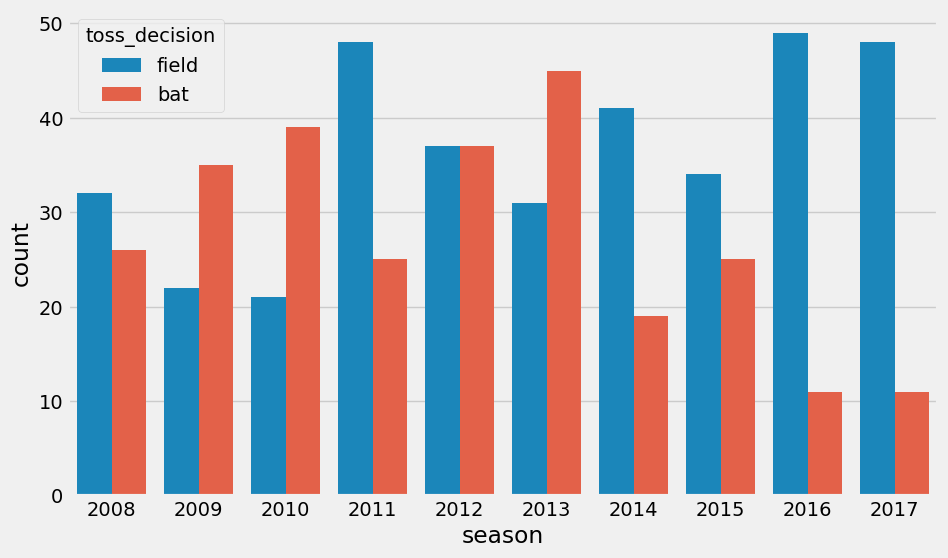

In [18]:
plt.subplots(figsize = (10, 6))
sns.countplot(x = 'season', hue = 'toss_decision', data = matches)
plt.show()

## Max Toss Winners

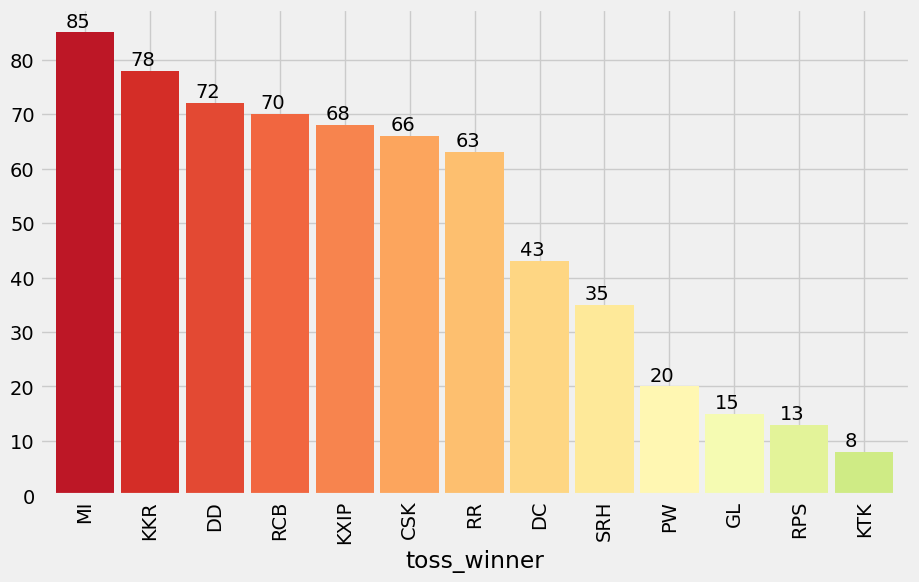

In [19]:
plt.subplots(figsize = (10, 6))

ax = matches['toss_winner'].value_counts().plot.bar(width = 0.9, color = sns.color_palette('RdYlGn', 20))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 1))

plt.show()    

## Total Matches Vs Wins for Teams

In [20]:
matches_played_byteams = pd.concat([matches['team1'], matches['team2']])

matches_played_byteams = matches_played_byteams.value_counts().reset_index()

matches_played_byteams.columns = ['Team', 'Total Matches']

matches_played_byteams['wins'] = matches['winner'].value_counts().reset_index()['winner']

matches_played_byteams.set_index('Team', inplace = True)

trace1 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['Total Matches'],
    name = 'Total Matches'
)

trace2 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['wins'],
    name = 'Matches Won'
)

data = [trace1, trace2]

layout = go.Layout(
    barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'stacked-bar')

In [21]:
py.init_notebook_mode(connected = True)

matches_played_byteams = pd.concat([matches['team1'], matches['team2']])

matches_played_byteams = matches_played_byteams.value_counts().reset_index()
matches_played_byteams.columns = ['Team', 'Total Matches']

wins = matches['winner'].value_counts().reset_index()
wins.columns = ['Team', 'Wins']

matches_played_byteams = matches_played_byteams.merge(wins, on = 'Team', how = 'left')
matches_played_byteams['Wins'] = matches_played_byteams['Wins'].fillna(0)

matches_played_byteams.set_index('Team', inplace =True)

#Debug: Check the Dataframe structure
print(matches_played_byteams)

#Step6: create stacked bar chart
trace1 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['Total Matches'],
    name = 'Total Matches'
)
trace2 = go.Bar(
    x = matches_played_byteams.index,
    y = matches_played_byteams['Wins'],
    name = 'Matches Won'
)

data = [trace1, trace2]
layout = go.Layout(
    title = 'Total Matches vs Matches Won by Teams',
    xaxis = dict(title = 'Teams'),
    yaxis = dict(title = 'Count'),
    barmode = 'stack'
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'stacked-bar')

      Total Matches  Wins
Team                     
MI              157    92
RCB             152    73
KKR             148    77
KXIP            148    70
DD              147    62
CSK             131    79
RR              118    63
SRH              76    42
DC               75    29
PW               46    12
GL               30    13
RPS              30    15
KTK              14     6


## Is Toss Winner also the match winner

In [22]:
matches.shape

(636, 17)

In [23]:
len(df)

1

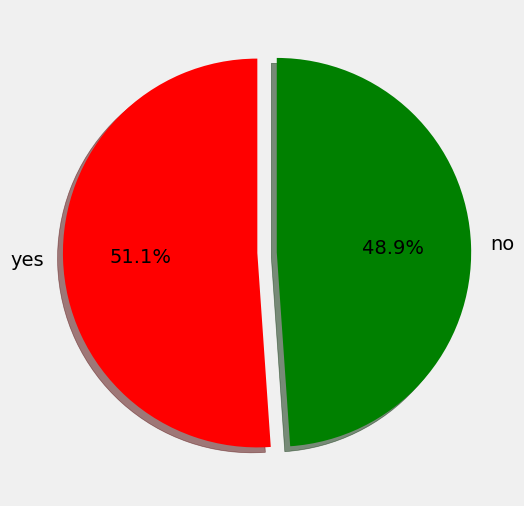

In [24]:
df = matches[matches['toss_winner'] == matches['winner']]

slices = [len(df), (636 - len(df))]

labels = ['yes', 'no']

plt.pie(slices, labels = labels,
        startangle = 90,
        shadow = True,
        explode = (0, 0.1),
        autopct = '%1.1f%%',
        colors = ['r', 'g'])

fig = plt.gcf()

fig.set_size_inches(6, 6)

plt.show()

## Matches played across each season

C:\Users\hp\AppData\Local\Temp\ipykernel_15132\3956040182.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\hp\AppData\Local\Temp\ipykernel_15132\3956040182.py:3: UserWarning:


The palette list has fewer values (6) than needed (10) and will cycle, which may produce an uninterpretable plot.



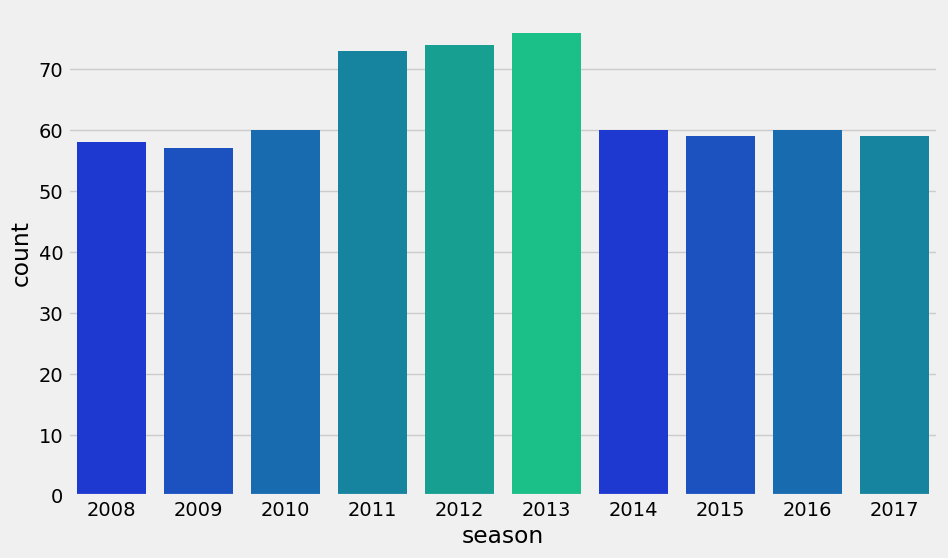

In [25]:
plt.subplots(figsize = (10, 6))

sns.countplot(x = 'season', data = matches, palette = sns.color_palette('winter'))

plt.show()

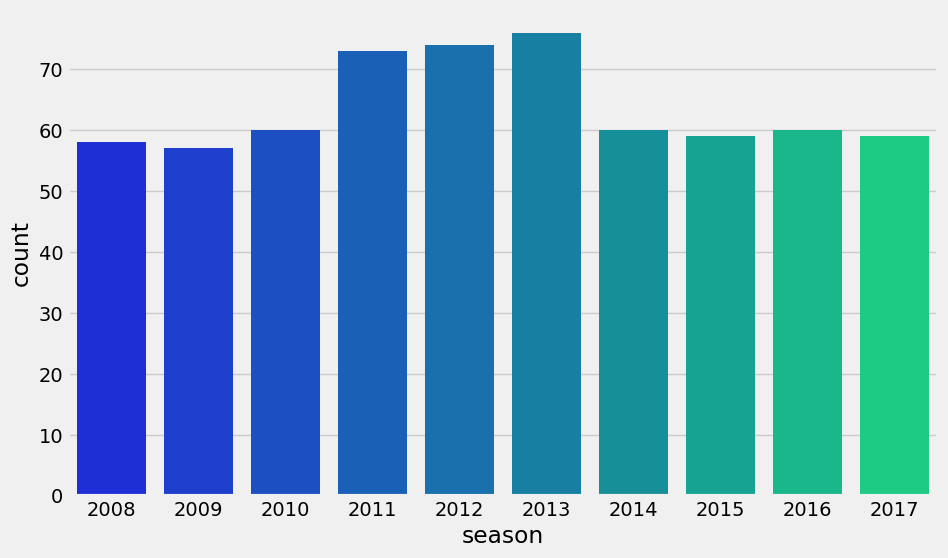

In [26]:
plt.subplots(figsize=(10, 6))

sns.countplot(x='season', data=matches, hue='season',
              palette=sns.color_palette('winter', n_colors=matches['season'].nunique()),
              legend=False)

plt.show()

## Run Across the Seasons

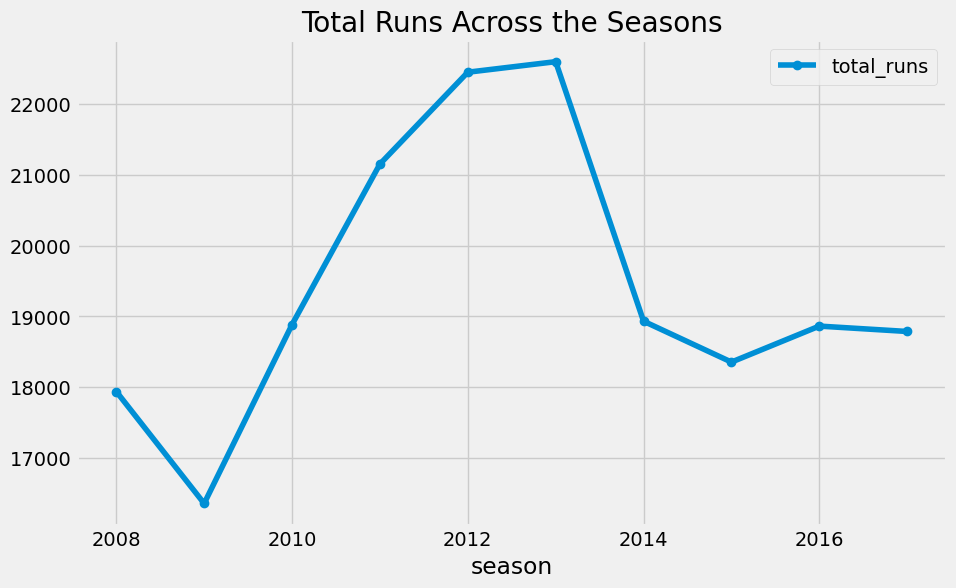

In [27]:
batsmen = matches[['id', 'season']].merge(delivery,
                                left_on = 'id',
                                right_on = 'match_id',
                                how = 'left').drop('id', axis = 1)

season = batsmen.groupby(['season'])['total_runs'].sum().reset_index()

season.set_index('season').plot(marker = 'o')

plt.gcf().set_size_inches(10, 6)

plt.title('Total Runs Across the Seasons')

plt.show()

## Average runs per match in each season

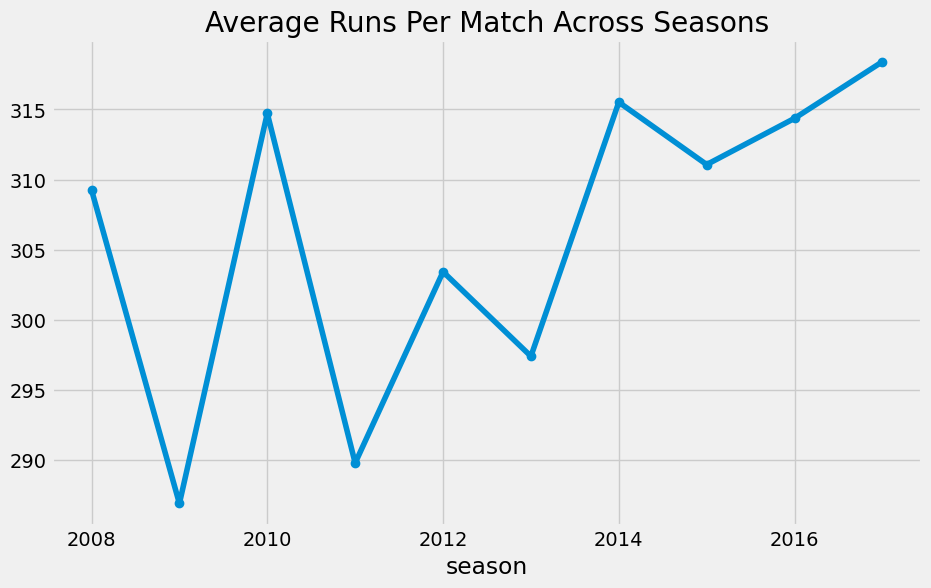

In [28]:
avgruns_each_season = matches.groupby(['season']).count().id.reset_index()

avgruns_each_season.rename(columns = {'id' : 'matches'}, inplace = True)

avgruns_each_season['total_runs'] = season['total_runs']

avgruns_each_season['average_runs_per_match'] = avgruns_each_season['total_runs'] / avgruns_each_season['matches']

avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker = 'o')

plt.gcf().set_size_inches(10, 6)

plt.title('Average Runs Per Match Across Seasons')

plt.show()

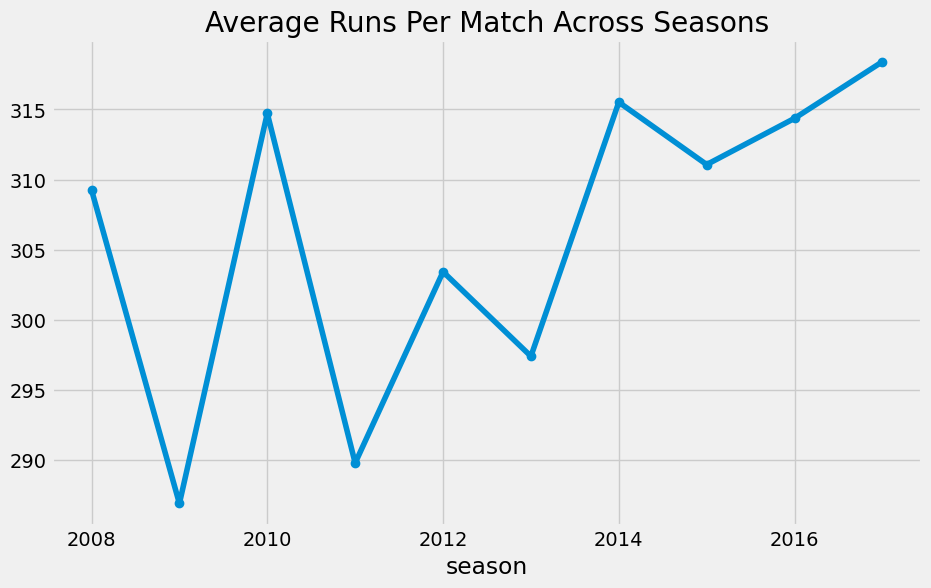

In [29]:
avgruns_each_season = matches.groupby(['season']).count().id.reset_index()

avgruns_each_season.rename(columns = {'id' : 'matches'}, inplace = True)

avgruns_each_season['total_runs'] = season['total_runs']

avgruns_each_season['average_runs_per_match'] = (avgruns_each_season['total_runs'] / avgruns_each_season['matches'])

avgruns_each_season.set_index('season')['average_runs_per_match'].plot(marker = 'o')

plt.gcf().set_size_inches(10, 6)

plt.title('Average Runs Per Match Across Seasons')

plt.show()

## Sixes and Four Across the Season

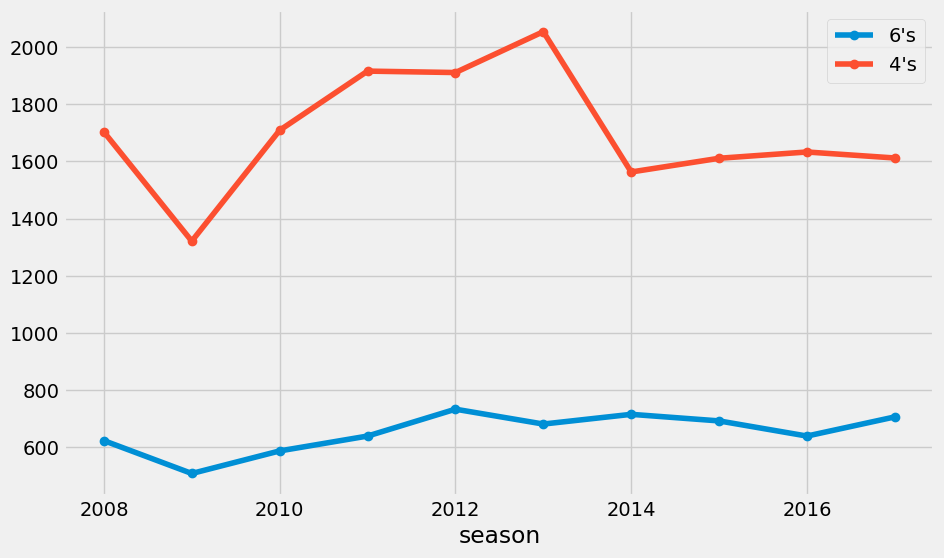

In [30]:
Season_boundaries = batsmen.groupby('season')['batsman_runs'].agg(lambda x : (x == 6).sum()).reset_index()

a = batsmen.groupby('season')['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()

Season_boundaries = Season_boundaries.merge(a, left_on = 'season', right_on = 'season', how = 'left')

Season_boundaries.rename(columns = {'batsman_runs_x' : "6's", 'batsman_runs_y' : "4's"}, inplace = True)

Season_boundaries.set_index('season')[["6's", "4's"]].plot(marker = 'o')

fig = plt.gcf()

fig.set_size_inches(10, 6)

plt.show()

## Runs Per Over By Teams Across Seasons

C:\Users\hp\AppData\Local\Temp\ipykernel_15132\3461741507.py:1: FutureWarning:

The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.



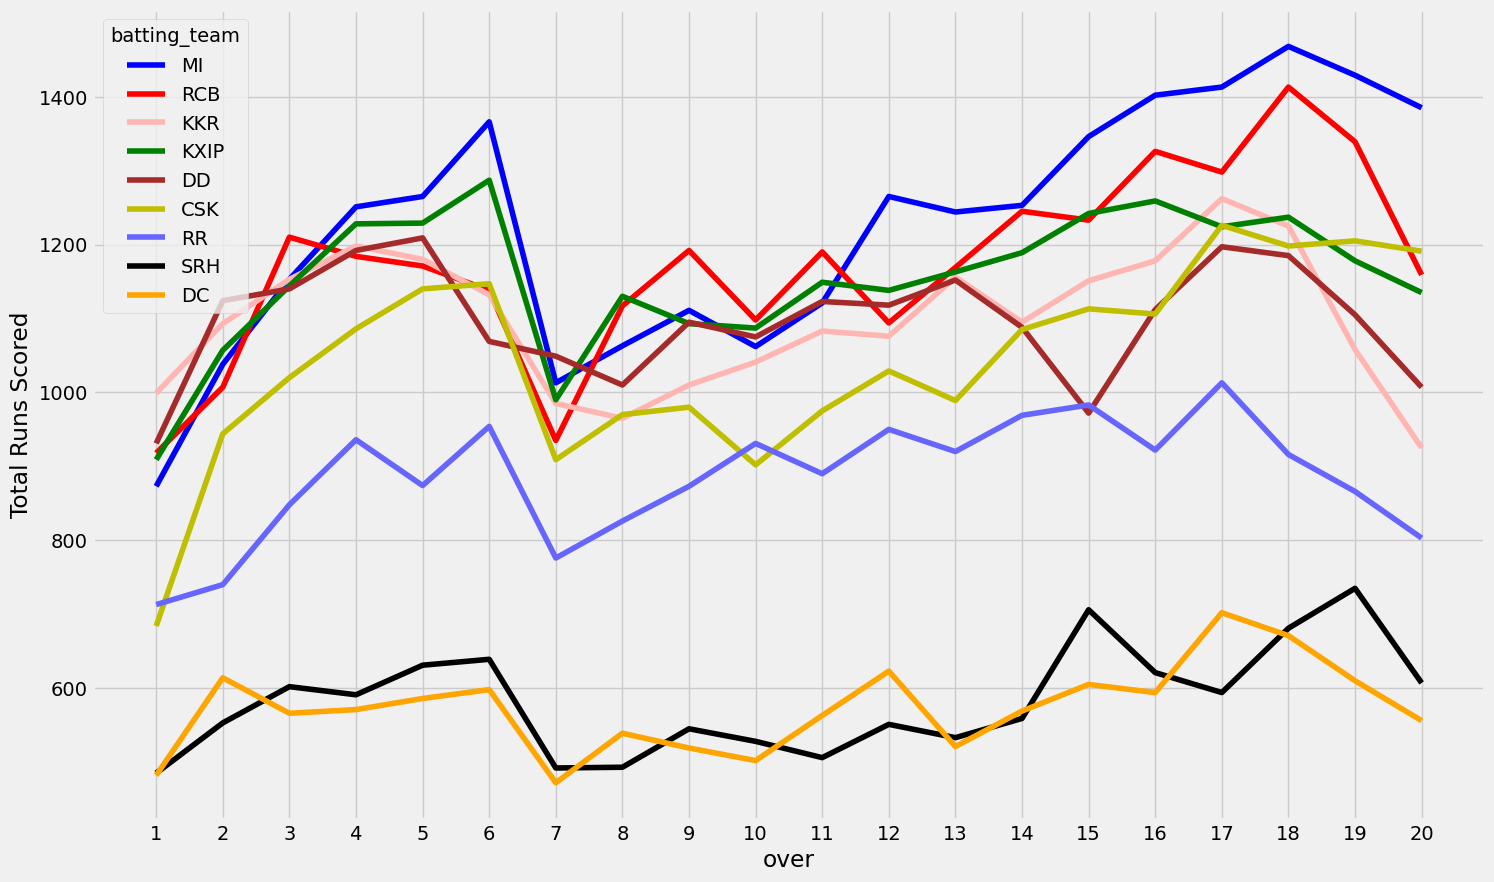

In [31]:
runs_per_over = delivery.pivot_table(index = ['over'], columns = 'batting_team',
                     values = 'total_runs',
                     aggfunc = sum)

runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches'] > 50].index)].plot(color = ['b', 'r', '#Ffb6b2', 'g', 'brown', 'y', '#6666ff', 'black', '#FFA500'])

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.xticks(x)

plt.ylabel('Total Runs Scored')

fig = plt.gcf()

fig.set_size_inches(16, 10)

plt.show()

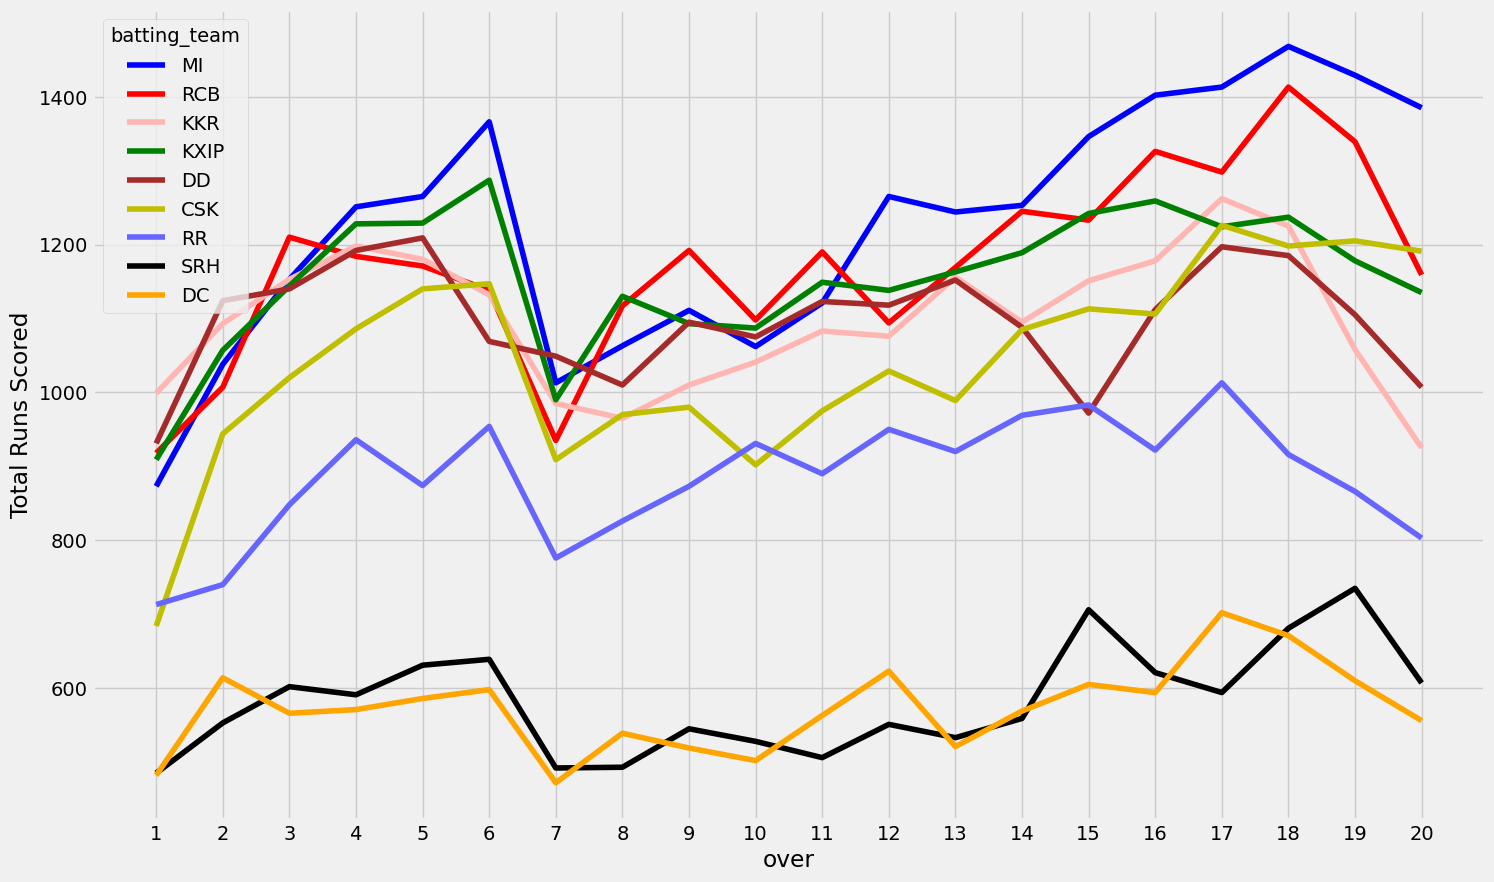

In [32]:
runs_per_over = delivery.pivot_table(index = ['over'], columns = 'batting_team',
                     values = 'total_runs',
                     aggfunc = 'sum')

runs_per_over[(matches_played_byteams[matches_played_byteams['Total Matches'] > 50].index)].plot(color = ['b', 'r', '#Ffb6b2', 'g', 'brown', 'y', '#6666ff', 'black', '#FFA500'])

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

plt.xticks(x)

plt.ylabel('Total Runs Scored')

fig = plt.gcf()

fig.set_size_inches(16, 10)

plt.show()

## Favourite Grounds

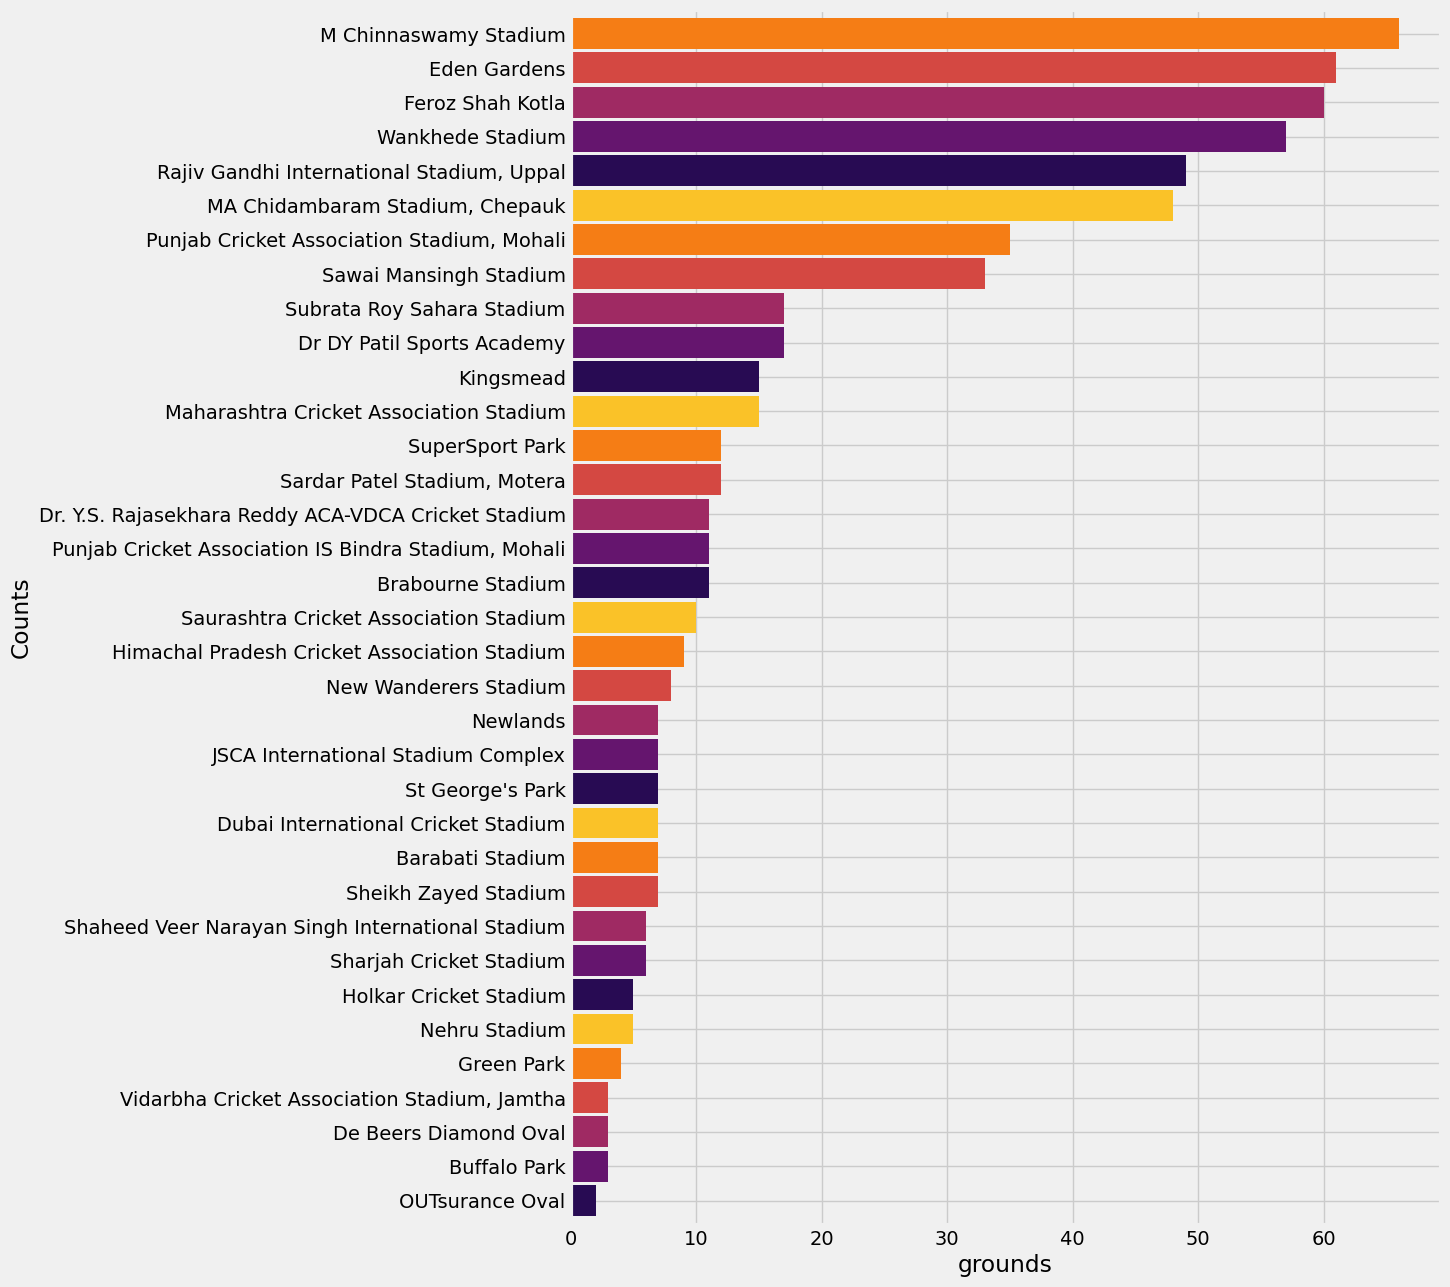

In [33]:
plt.subplots(figsize = (10, 15))

ax = matches['venue'].value_counts().sort_values(ascending = True).plot.barh(width = 0.9, color = sns.color_palette('inferno',))

ax.set_xlabel('grounds')

ax.set_ylabel('Counts')

plt.show()

## Maximum Man of the Matches

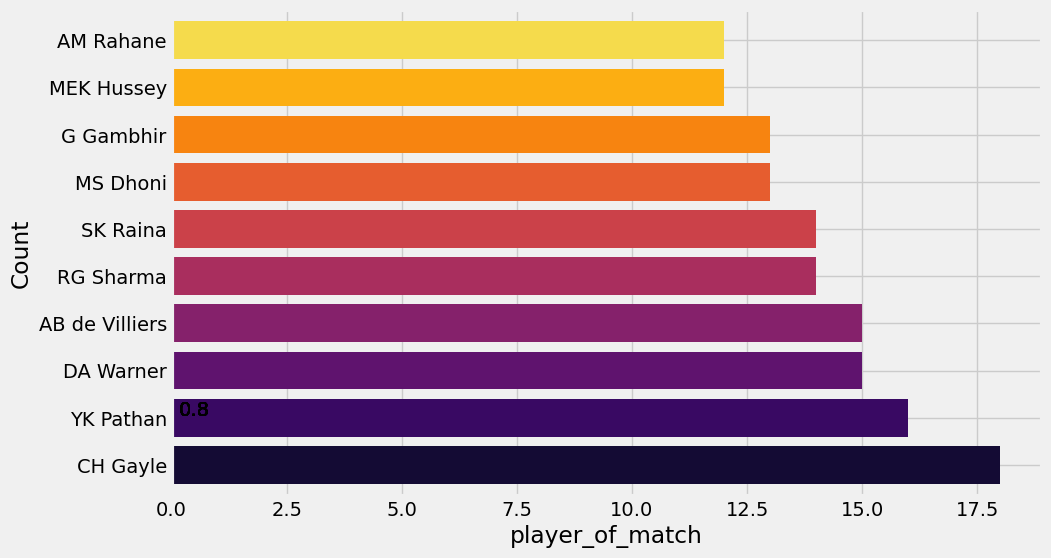

In [34]:
plt.subplots(figsize = (10, 6))

ax = matches['player_of_match'].value_counts().head(10).plot.barh(width = 0.8, color = sns.color_palette('inferno', 10))

ax.set_xlabel('player_of_match')

ax.set_ylabel('Count')

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.25))

plt.show()

## Winner by Year

In [35]:
print('Winner By Years: \n')

for i in range(2008, 2017):
    df = ((matches[matches['season'] == i]).iloc[-1])
    print(df[[1, 10]].values)

Winner By Years: 

[np.int64(2008) 'RR']
[np.int64(2009) 'DC']
[np.int64(2010) 'CSK']
[np.int64(2011) 'CSK']
[np.int64(2012) 'KKR']
[np.int64(2013) 'MI']
[np.int64(2014) 'KKR']
[np.int64(2015) 'MI']
[np.int64(2016) 'SRH']


C:\Users\hp\AppData\Local\Temp\ipykernel_15132\966319053.py:5: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [36]:
print('Winner By Years: \n')

for i in range(2008, 2017):
    df = ((matches[matches['season'] == i]).iloc[-1])
    print(df.iloc[[1, 10]].values)

Winner By Years: 

[np.int64(2008) 'RR']
[np.int64(2009) 'DC']
[np.int64(2010) 'CSK']
[np.int64(2011) 'CSK']
[np.int64(2012) 'KKR']
[np.int64(2013) 'MI']
[np.int64(2014) 'KKR']
[np.int64(2015) 'MI']
[np.int64(2016) 'SRH']


## Super Over


In [37]:
print('\n Total Matches With Super Overs:', delivery[delivery['is_super_over'] == 1].match_id.nunique())


 Total Matches With Super Overs: 7


In [38]:
teams =  ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW']
play = delivery[delivery['is_super_over'] == 1].batting_team.unique()
play = list(play)

print('Teams Who Havent Evere Played A Super Over Are:', list(set(teams) - set(play)))

Teams Who Havent Evere Played A Super Over Are: ['KTK', 'RPS', 'PW', 'DC']


## Favourite Umpires:

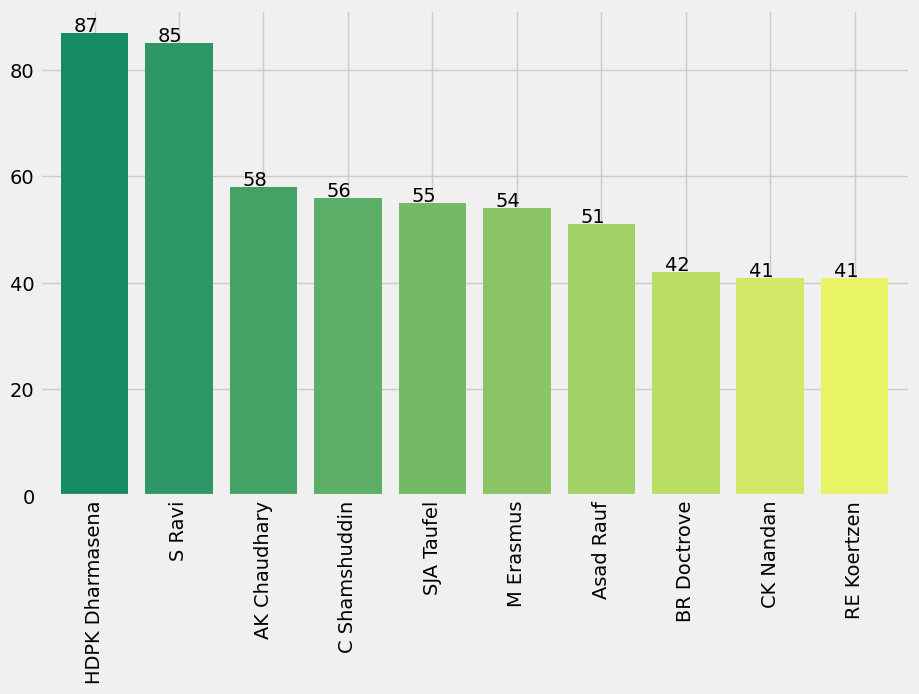

In [39]:
plt.subplots(figsize = (10, 6))
ump = pd.concat([matches['umpire1'], matches['umpire2']])

ax = ump.value_counts().head(10).plot.bar(width = 0.8, color = sns.color_palette('summer', 10))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 0.25))

plt.show()

## Team1 Vs Team2

#### MI Vs KKR

In [40]:
def team1_vs_team2(team1, team2):
    mt1 = matches[((matches['team1'] == team1) | (matches['team2'] == team1)) & ((matches['team1'] == team2) | (matches['team2'] == team2))]
    sns.countplot(x = 'season', hue = 'winner', data = mt1, palette = 'Set3')
    plt.xticks(rotation = 'vertical')
    leg = plt.legend(loc = 'upper center')
    fig = plt.gcf()
    fig.set_size_inches(10, 6)
    plt.show()

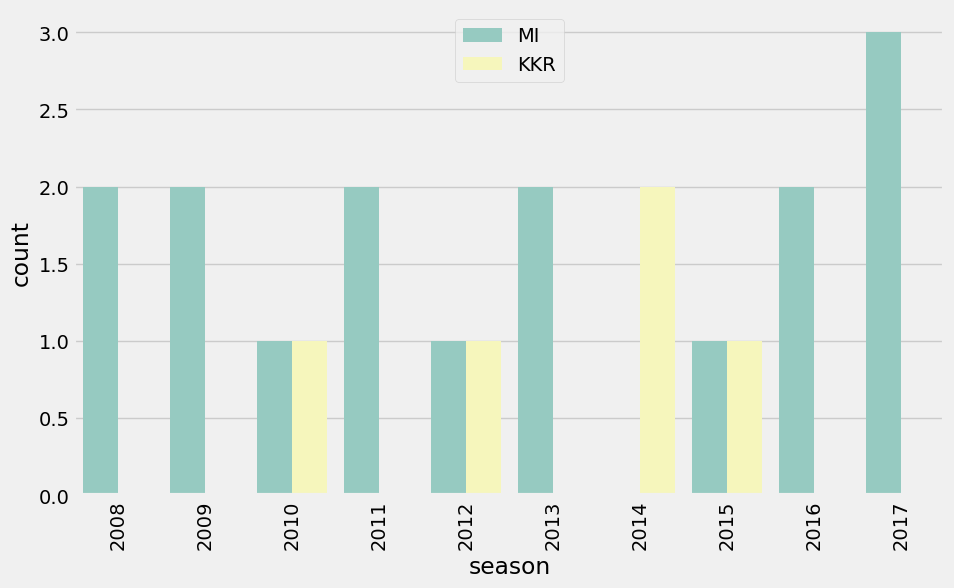

In [41]:
team1_vs_team2('KKR', 'MI')

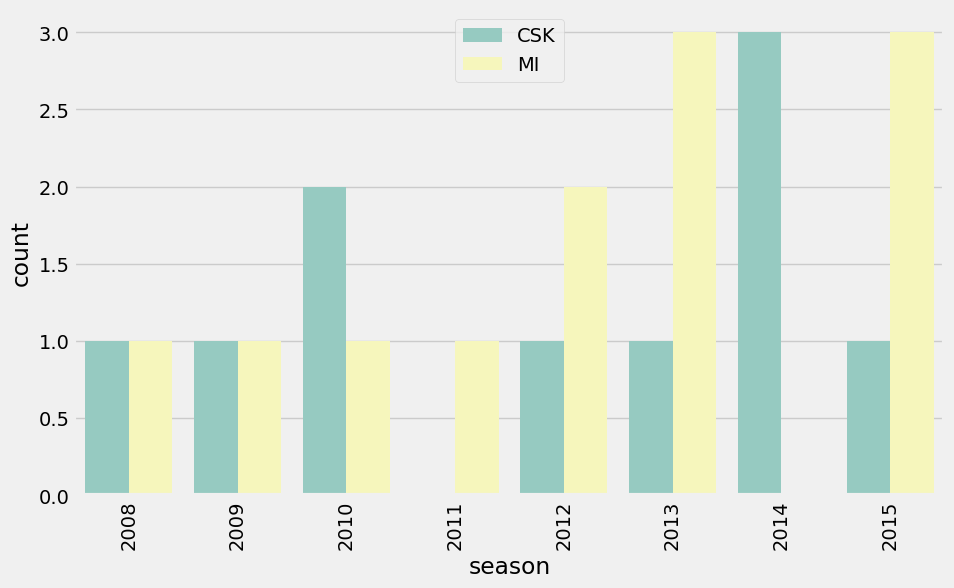

In [42]:
team1_vs_team2('CSK', 'MI')

## Matches Won by a Team Against Other Teams

In [43]:
def comparator(team1):
    teams = ['MI', 'KKR', 'RCB', 'DC', 'CSK', 'RR', 'DD', 'GL', 'KXIP', 'SRH', 'RPS', 'KTK', 'PW']
    teams.remove(team1)
    opponents = teams.copy()
    mt1= matches[((matches['team1'] == team1) | (matches['team2'] == team1))]
    for i in opponents:
        mask = (((mt1['team1'] == i) | (mt1['team2'] == i))) & ((mt1['team1'] == team1) | (mt1['team2'] == team1))
        mt2 = mt1.loc[mask, 'winner'].value_counts().to_frame().T
        print(mt2)

In [44]:
comparator('MI')

winner  MI  KKR
count   16    5
winner  MI  RCB
count   13    8
winner  MI  DC
count    6   4
winner  MI  CSK
count   12   10
winner  MI  RR
count   10   6
winner  MI  DD
count   11   9
winner  MI  GL
count    2   2
winner  MI  KXIP
count   10    10
winner  MI  SRH
count    5    5
winner  RPS  MI
count     4   2
winner  KTK
count     1
winner  MI  PW
count    5   1


## Score Distribution For Teams by Innings

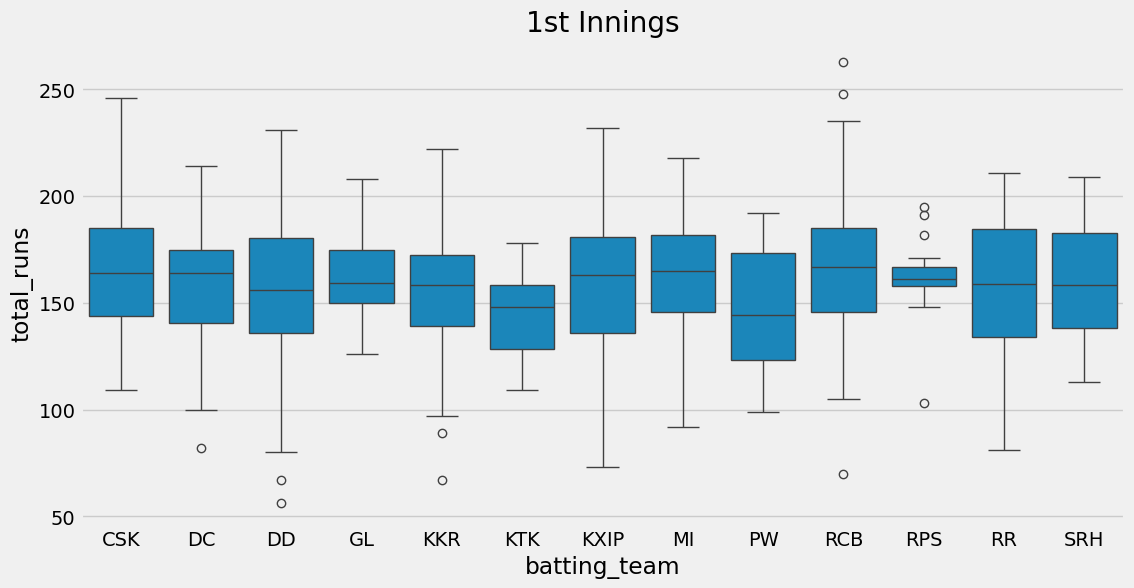

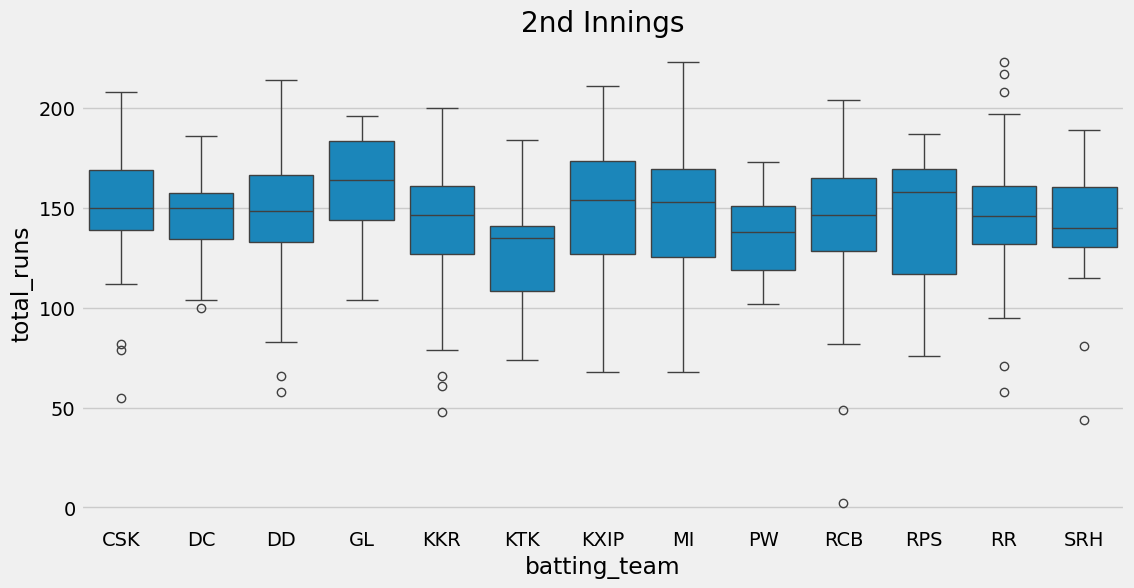

In [45]:
plt.subplots(figsize = (12, 6))

xyz = delivery.groupby(['match_id', 'inning', 'batting_team'])['total_runs'].sum().reset_index()

xyz.drop('match_id', axis = 1, inplace = True)

xyz = xyz.sort_values(by = ['batting_team', 'total_runs'], ascending = True)

score_1_inning = xyz[xyz['inning'] == 1]

score_2_inning = xyz[xyz['inning'] == 2]

sns.boxplot(x = 'batting_team', y = 'total_runs', data = score_1_inning).set_title('1st Innings')

plt.show()

sns.boxplot(x = 'batting_team', y = 'total_runs', data = score_2_inning).set_title('2nd Innings')

fig = plt.gcf()

fig.set_size_inches(12, 6)

## 200+ Scores

In [46]:
high_scores = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

high_scores = high_scores[high_scores['total_runs'] >= 200]

high_scores.nlargest(10, 'total_runs')

match_id  inning batting_team bowling_team  total_runs
829        411       1          RCB           PW         263
1250       620       1          RCB           GL         248
416        206       1          CSK           RR         246
122         61       1          CSK         KXIP         240
1134       562       1          RCB           MI         235
596        296       1         KXIP          RCB         232
522        259       1           DD         KXIP         231
981        486       1         KXIP          CSK         231
100         50       1         KXIP           MI         230
1170       580       1          RCB          SRH         227

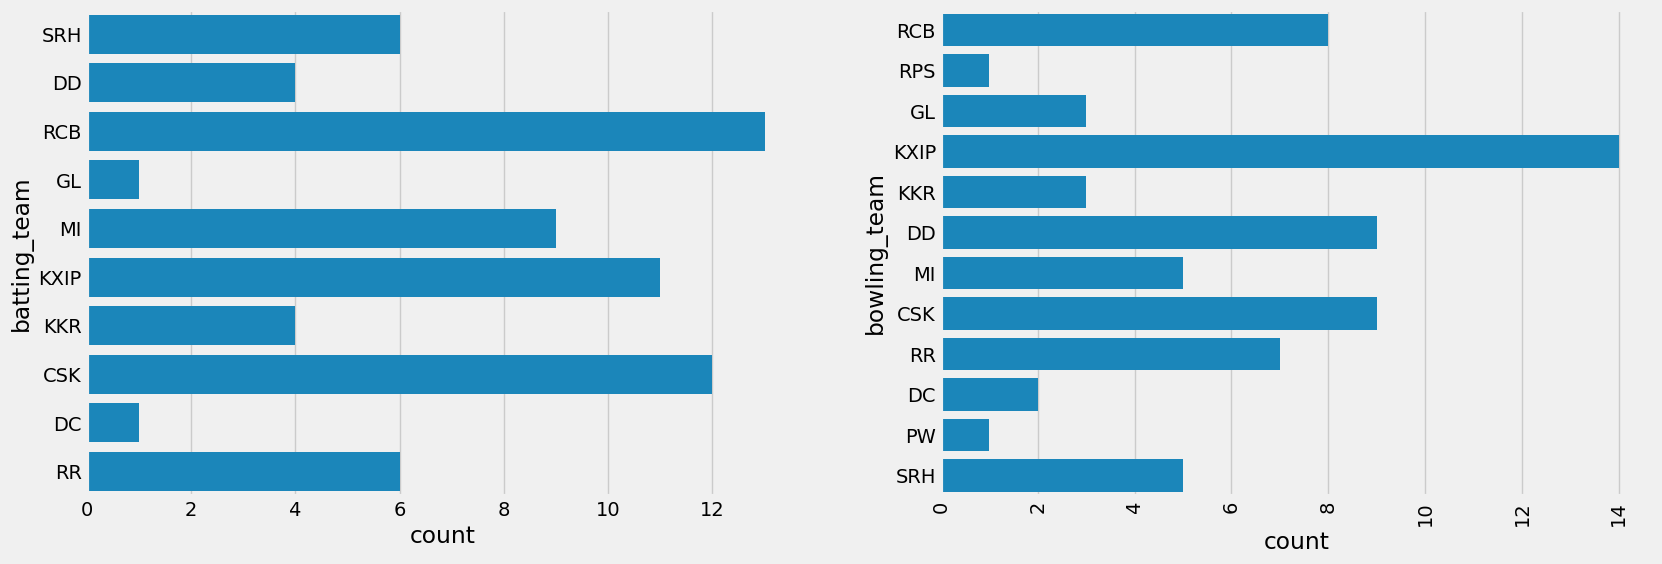

In [47]:
fig, ax = plt.subplots(1, 2)

sns.countplot(high_scores['batting_team'], ax = ax[0])

sns.countplot(high_scores['bowling_team'], ax = ax[1])

plt.xticks(rotation = 90)

fig = plt.gcf()

fig.set_size_inches(18, 6)

plt.show()

In [48]:
print('Teams who have not ever scored 200+ runs:', list(set(teams) - set(high_scores['batting_team'])))

print('Teams who have not conceeded over 200+ runs:', list(set(teams) - set(high_scores['bowling_team'])))

Teams who have not ever scored 200+ runs: ['RPS', 'PW', 'KTK']
Teams who have not conceeded over 200+ runs: ['KTK']


In [49]:
high = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

high.set_index(['match_id'], inplace = True)

high['total_runs'].max()

high = high.rename(columns = {'total_runs' : 'count'})

high = high[high['count'] >= 200].groupby(['inning', 'batting_team', 'bowling_team']).count()

high

count
inning batting_team bowling_team       
1      CSK          DD                1
                    KKR               1
                    KXIP              2
                    MI                1
                    RCB               1
                    RR                1
                    SRH               2
       DC           RR                1
       DD           KXIP              1
                    MI                1
                    RPS               1
       GL           DD                1
       KKR          DC                1
                    KXIP              1
                    RCB               1
       KXIP         CSK               2
                    MI                1
                    RCB               2
                    RR                1
       MI           CSK               1
                    DD                4
                    RCB               1
                    RR                1
       RCB          CSK               1
                    DD                1
                    GL                2
                    KXIP              3
                    MI                1
                    PW                1
                    RR                1
                    SRH               1
       RR           CSK               1
                    DD                1
                    KXIP              1
       SRH          KKR               1
                    KXIP              2
                    RCB               2
                    RR                1
2      CSK          KXIP              1
                    RCB               1
                    RR                1
       DD           GL                1
       KKR          KXIP              1
       KXIP         CSK               2
                    DD                1
                    KKR               1
                    SRH               1
       MI           CSK               1
                    KXIP              1
       RCB          KXIP              1
                    SRH               1
       RR           CSK               1
                    DC                1
                    MI                1

In [50]:
high_scores = delivery.groupby(['match_id', 'inning', 'batting_team', 'bowling_team'])['total_runs'].sum().reset_index()

high_scores1 = high_scores[high_scores['inning'] == 1]

high_scores2 = high_scores[high_scores['inning'] == 2]

high_scores1 = high_scores1.merge(high_scores2[['match_id', 'inning', 'total_runs']], on = 'match_id')

high_scores1.rename(columns = {'inning_x' : 'inning_1', 'inning_y' : 'inning_2', 'total_runs_x' : 'inning1_runs', 'total_runs_y': 'inning2_runs'}, inplace = True)

high_scores1 = high_scores1[high_scores1['inning1_runs'] >= 200]

high_scores1['is_score_chased'] = 1

high_scores1['is_score_chased'] = np.where(high_scores1['inning1_runs'] <= high_scores1['inning2_runs'],
                                           'yes', 'no')

high_scores1.head()

match_id  inning_1 batting_team bowling_team  inning1_runs  inning_2  \
0          1         1          SRH          RCB           207         2   
8          9         1           DD          RPS           205         2   
19        20         1          RCB           GL           213         2   
31        32         1          SRH         KXIP           207         2   
35        36         1          SRH          KKR           209         2   

    inning2_runs is_score_chased  
0            172              no  
8            108              no  
19           192              no  
31           181              no  
35           161              no

## Chances of Chasing 200+ Target


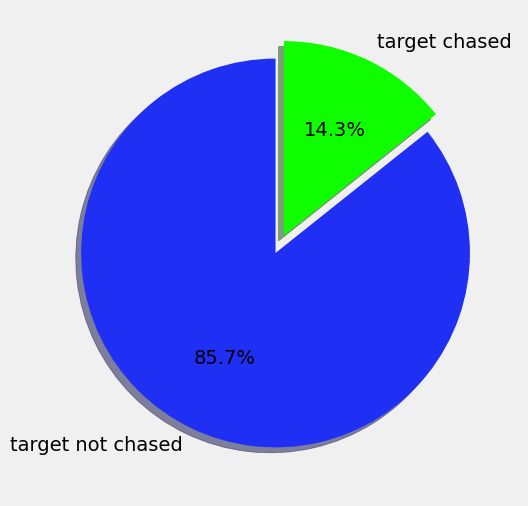

In [51]:
slices = high_scores1['is_score_chased'].map({'yes' : 1, 'no' : 0}).value_counts()

labels = ['target not chased', 'target chased']

plt.pie(slices, labels=labels, colors = ['#1f2ff3', '#0fff00'], startangle = 90, shadow = True, explode = (0, 0.1), autopct = '%1.1f%%')

fig = plt.gcf()

fig.set_size_inches(6, 6)

plt.show()

## Batsman Comparator

In [52]:
balls = delivery.groupby(['batsman'])['ball'].count().reset_index()

runs = delivery.groupby(['batsman'])['batsman_runs'].sum().reset_index()

balls = balls.merge(runs, left_on = 'batsman', right_on = 'batsman', how = 'outer')

balls.rename({'ball' : 'ball_x', 'batsman_runs' : 'ball_y'}, axis = 1, inplace = True)

fours = delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 4).sum()).reset_index()

sixes = delivery.groupby('batsman')['batsman_runs'].agg(lambda x: (x == 6).sum()).reset_index()

balls['strike_rate'] = balls['ball_y'] / balls['ball_x'] * 100

In [53]:
balls = balls.merge(sixes, left_on = 'batsman', right_on = 'batsman', how = 'outer')

In [54]:
balls = balls.merge(fours, left_on = 'batsman', right_on = 'batsman', how = 'outer')

In [55]:
compare = delivery.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index()

In [56]:
compare = compare.groupby(['batsman', 'batting_team'])['batsman_runs'].max().reset_index()

In [57]:
balls = balls.merge(compare, left_on = 'batsman', right_on = 'batsman', how = 'outer')

In [58]:
balls.rename({'ball_x': 'balls', 'ball_y' : 'runs', 'batsman_runs_x' : "6's", 'batsman_runs_y' : "4's", 'batting_team' : 'Team', 'batsman_runs': 'Highest_score'}, axis = 1, inplace = True)

In [59]:
balls.head()

batsman  balls  runs  strike_rate  6's  4's Team  Highest_score
0  A Ashish Reddy    196   280   142.857143   15   16   DC             10
1  A Ashish Reddy    196   280   142.857143   15   16  SRH             36
2      A Chandila      7     4    57.142857    0    0   RR              4
3        A Chopra     75    53    70.666667    0    7  KKR             24
4     A Choudhary     20    25   125.000000    1    1  RCB             15

In [60]:
def batsman_comparator(start1, start2, batsman1, batsman2):
    sns.FacetGrid(balls, hue = 'Team', height = 8).map(plt.scatter, start1, start2, alpha = 0.5).add_legend()

    bats1 = balls[balls['batsman'].str.contains(batsman1)].sort_values(by = start1, ascending = False)
    bats2 = balls[balls['batsman'].str.contains(batsman2)].sort_values(by = start1, ascending = False)

    plt.scatter(bats2[start1], bats2[start2], s = 75, c = '#f73545')
    plt.text(x = bats1[start1].values[0], y = bats1[start2].values[0], s = batsman1,
        fontsize = 10, weight = 'bold', color = '#ff58fd')
    plt.scatter(bats2[start1], bats2[start2], s = 75, c = '#f73545')
    plt.text(x = bats2[start1].values[0], y = bats2[start2].values[0] + 1, s = batsman2,
        fontsize = 10, weight = 'bold', color = '#ff58fd')

    plt.gcf().set_size_inches(15, 10)
    plt.title('Batsman Comparator', size = 25)
    plt.show()

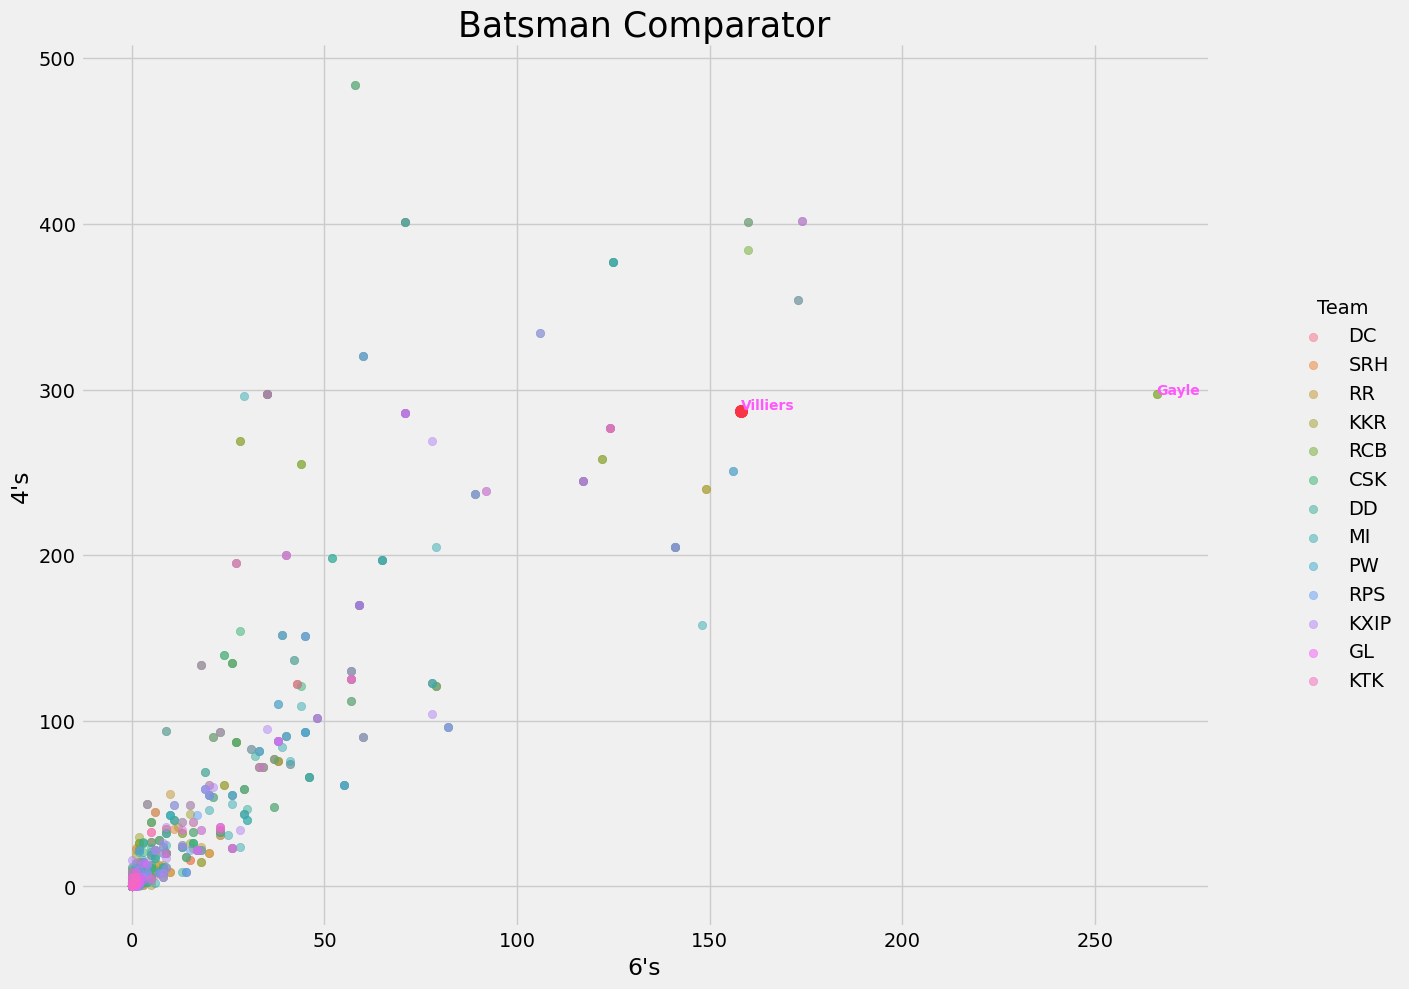

In [61]:
batsman_comparator("6's", "4's", "Gayle", 'Villiers')

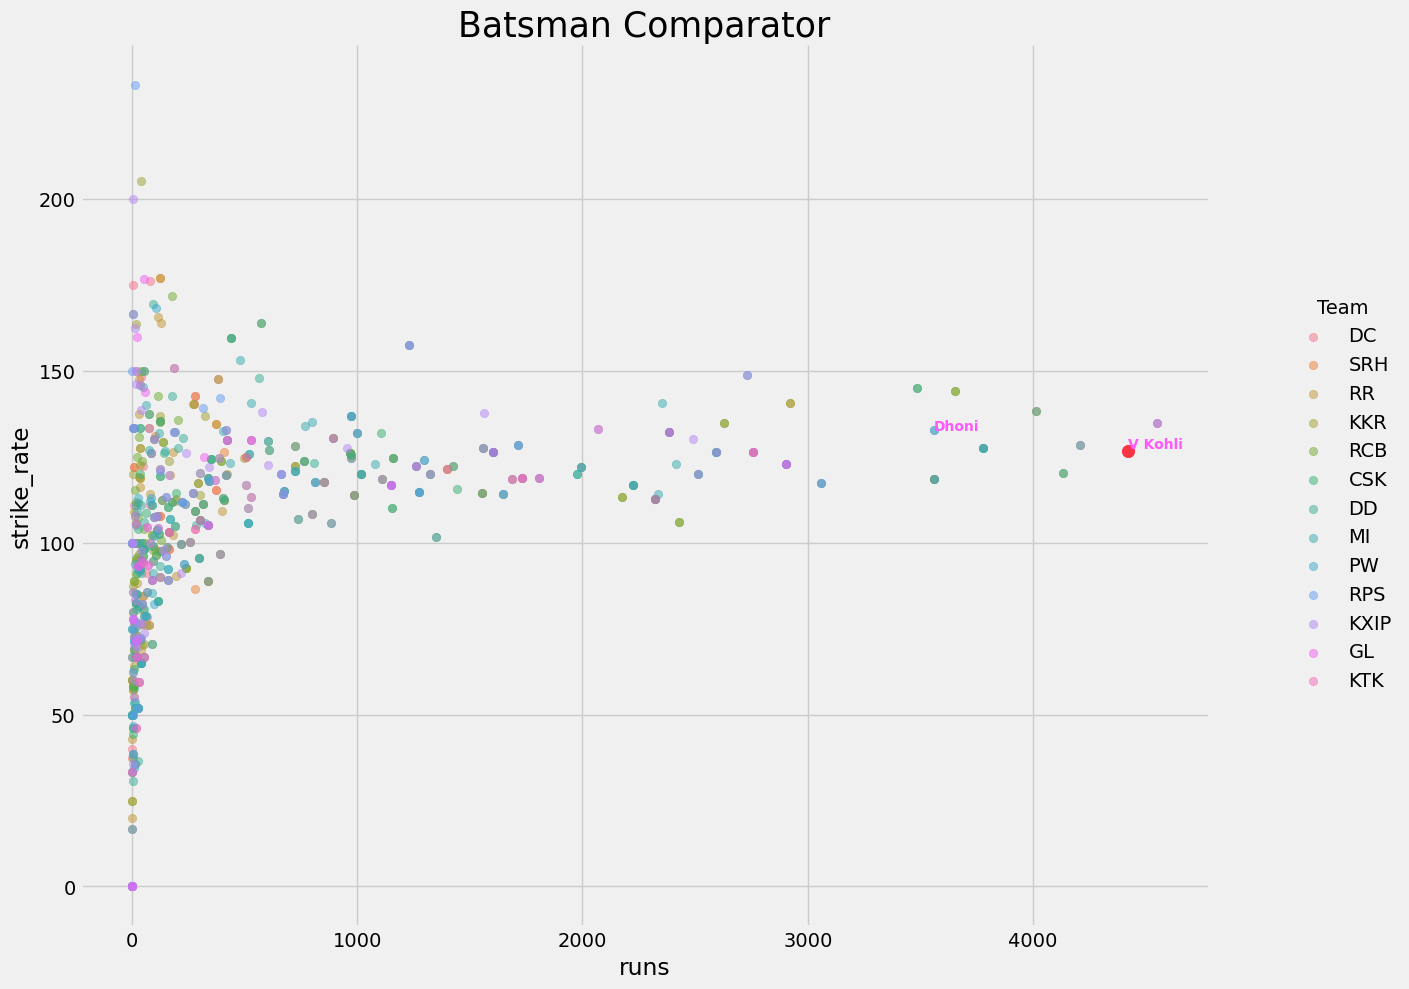

In [62]:
batsman_comparator('runs', 'strike_rate', 'Dhoni', 'V Kohli')

## Top 10 Batsman

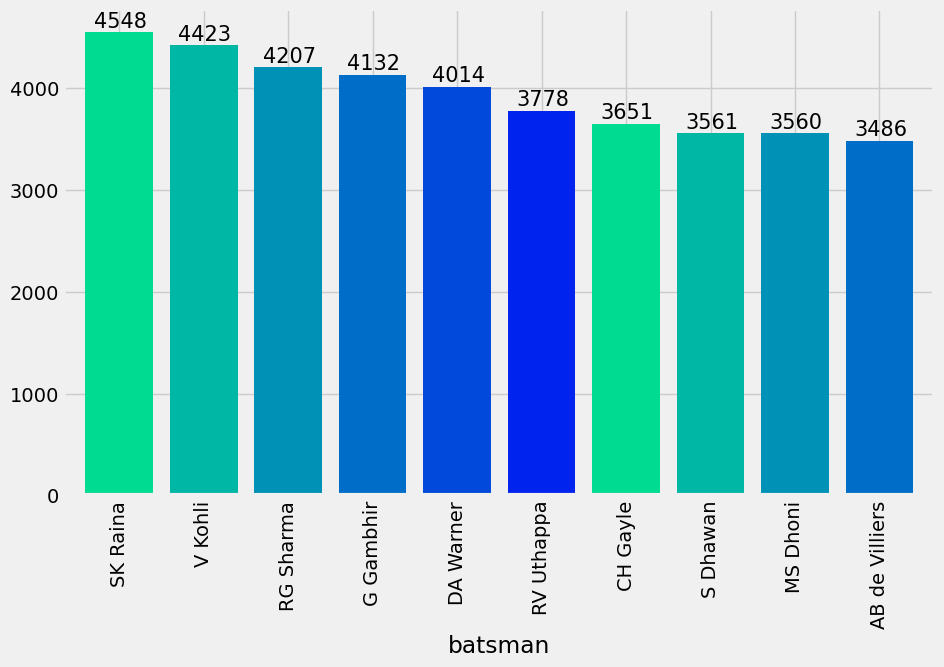

In [63]:
plt.subplots(figsize = (10, 6))

max_runs = delivery.groupby(['batsman'])['batsman_runs'].sum()

ax = max_runs.sort_values(ascending = False)[:10].plot.bar(width = 0.8, color = sns.color_palette('winter_r'))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.1, p.get_height() + 50), fontsize = 15)

plt.show()

## Top Batsman's with 1's, 2's, 3's, 4's

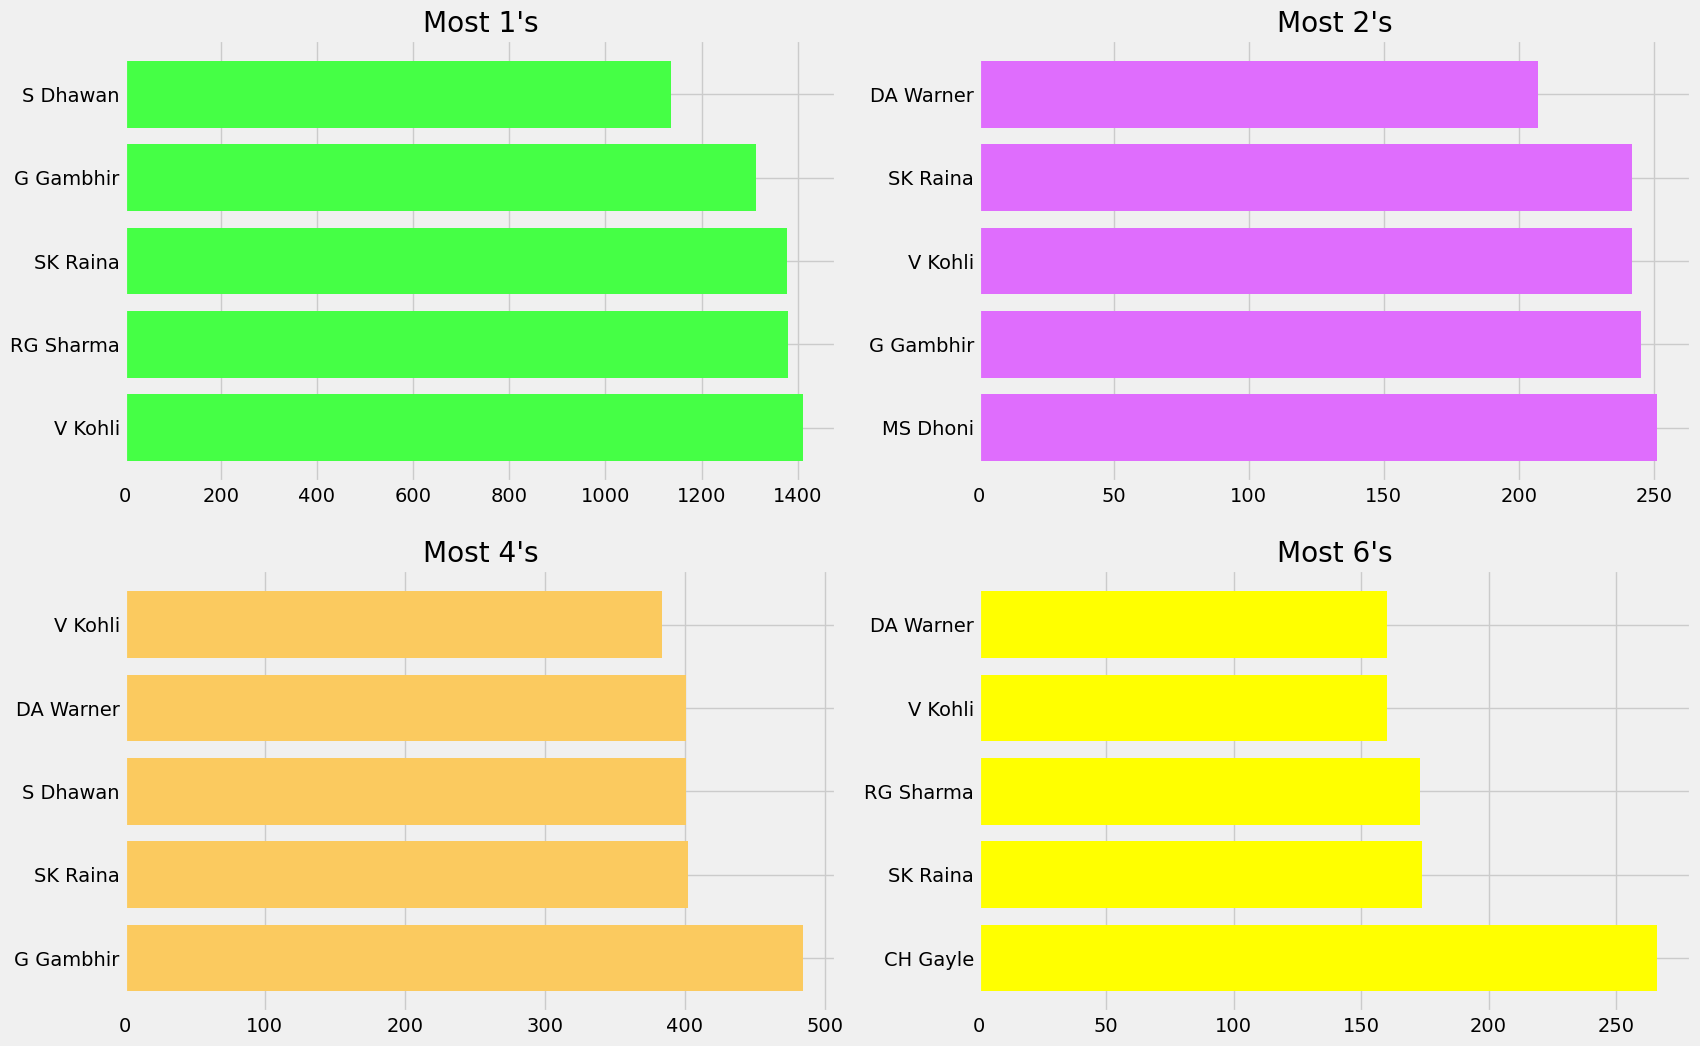

In [64]:
toppers = delivery.groupby(['batsman', 'batsman_runs'])['total_runs'].count().reset_index()

toppers = toppers.pivot_table(index = 'batsman', columns = 'batsman_runs', values = 'total_runs', fill_value = 0)

fig, ax = plt.subplots(2, 2, figsize = (18, 12))

toppers[1].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[0, 0], color = '#45ff45', width = 0.8)
ax[0, 0].set_title("Most 1's")
ax[0, 0].set_ylabel("")

toppers[2].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[0, 1], color = '#df6dfd', width = 0.8)
ax[0, 1].set_title("Most 2's")
ax[0, 1].set_ylabel("")

toppers[4].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[1, 0], color = '#fbca5f', width = 0.8)
ax[1, 0].set_title("Most 4's")
ax[1, 0].set_ylabel("")

toppers[6].sort_values(ascending = False)[:5].plot(kind = 'barh', ax = ax[1, 1], color = '#ffff00', width = 0.8)
ax[1, 1].set_title("Most 6's")
ax[1, 1].set_ylabel("")

plt.show()

## Top Individual Scores

In [65]:
top_scores = delivery.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index()

top_scores.sort_values('batsman_runs', ascending = 0).head(10)

top_scores.nlargest(10, 'batsman_runs')

match_id         batsman batting_team  batsman_runs
6200       411        CH Gayle          RCB           175
900         60     BB McCullum          KKR           158
8426       562  AB de Villiers          RCB           133
9257       620  AB de Villiers          RCB           129
5585       372        CH Gayle          RCB           128
3135       206         M Vijay          CSK           127
529         36       DA Warner          SRH           126
7752       516        V Sehwag         KXIP           122
3686       243     PC Valthaty         KXIP           120
4223       279        V Sehwag           DD           119

## Individual Scores ny Top Batsman each Inning

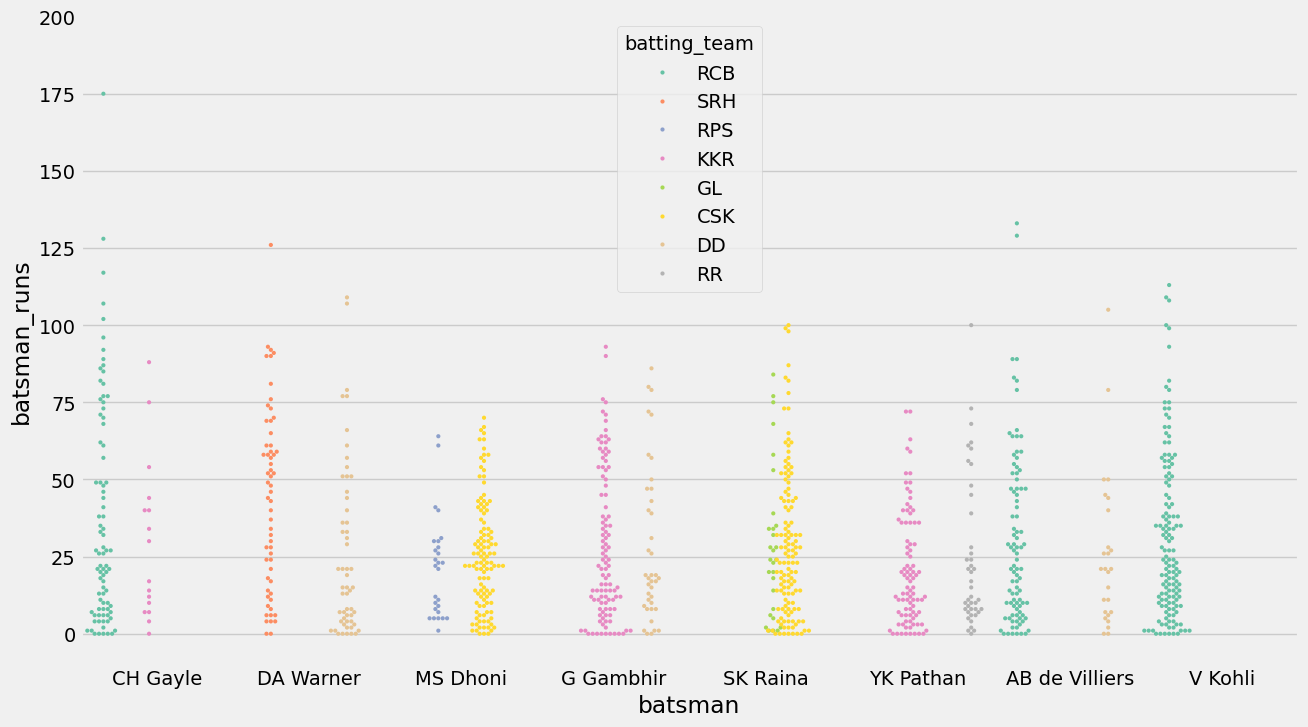

In [66]:
swarm = ['CH Gayle', 'V Kohli', 'G Gambhir', 'SK Raina', 'YK Pathan', 'MS Dhoni', 'AB de Villiers', 'DA Warner']

scores = delivery.groupby(['match_id', 'batsman', 'batting_team'])['batsman_runs'].sum().reset_index()

scores = scores[top_scores['batsman'].isin(swarm)]

sns.swarmplot(x = 'batsman', y = 'batsman_runs', data = scores,
              hue = 'batting_team',
              palette = 'Set2',
              size = 3, dodge = True)

fig = plt.gcf()

fig.set_size_inches(14, 8)

plt.ylim(-10, 200)

plt.show()

## Runs Scored by Batsman Across Seasons

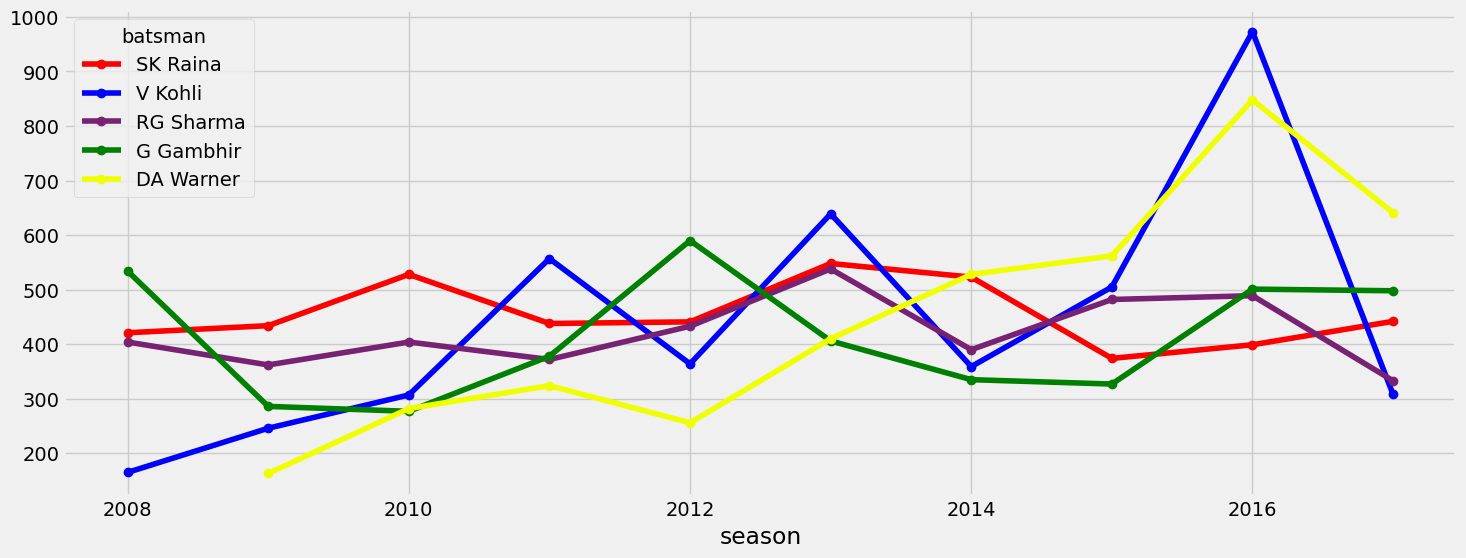

In [67]:
a = batsmen.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

a = a.groupby(['season', 'batsman'])['batsman_runs'].sum().unstack().T

a['Total'] = a.sum(axis = 1)

a = a.sort_values(by = 'Total', ascending = 0)[:5]

a.drop('Total', axis = 1, inplace = True)

a.T.plot(color = ['red', 'blue', '#772272', 'green', '#f0ff00'], marker = 'o')

fig = plt.gcf()

fig.set_size_inches(16, 6)

plt.show()

## Frequency of Scores

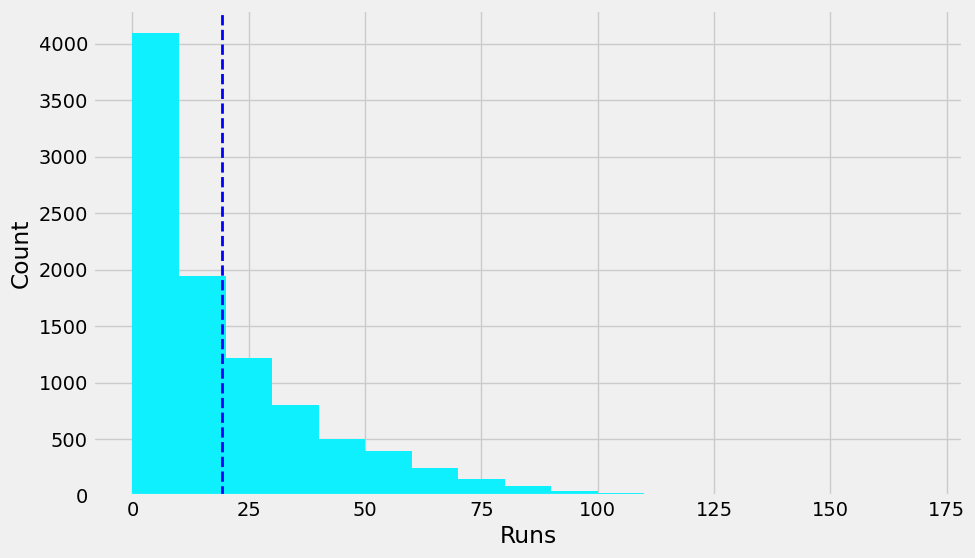

In [68]:
plt.subplots(figsize = (10, 6))

bins = range(0, 180, 10)

plt.hist(top_scores['batsman_runs'], bins, histtype = 'bar', rwidth = 1.2, color = '#0ff0ff')

plt.xlabel('Runs')

plt.ylabel('Count')

plt.axvline(top_scores['batsman_runs'].mean(), color = 'b', linestyle = 'dashed', linewidth = 2)

plt.plot()
plt.show()

## Orange Caps Each Season (Highest Run Getter Per Season)

In [69]:
orange = matches[['id', 'season']]

orange = orange.merge(delivery, left_on = 'id', right_on = 'match_id', how = 'left')

orange = orange.groupby(['season', 'batsman'])['batsman_runs'].sum().reset_index()

orange = orange.sort_values('batsman_runs', ascending = 0)

orange = orange.drop_duplicates(subset = ['season'], keep = 'first')

orange.sort_values(by = 'season')

trace1 = go.Bar(
    x = orange['season'].values,
    y = orange['batsman_runs'].values,
    name = 'Total Matches',
    text = orange['batsman'].values,
    marker = dict(
        color = 'rgb(255, 140, 0)',
        line = dict(
            color = 'rgb(8, 48, 107)',
            width = 1.5,
            )
    ),
    opacity = 1
)

layout = go.Layout(
    title = 'Orange-Cap Holders')

data = [trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'stacked-bar')

## Top Bowlers 

#### Highest Wicket Taker

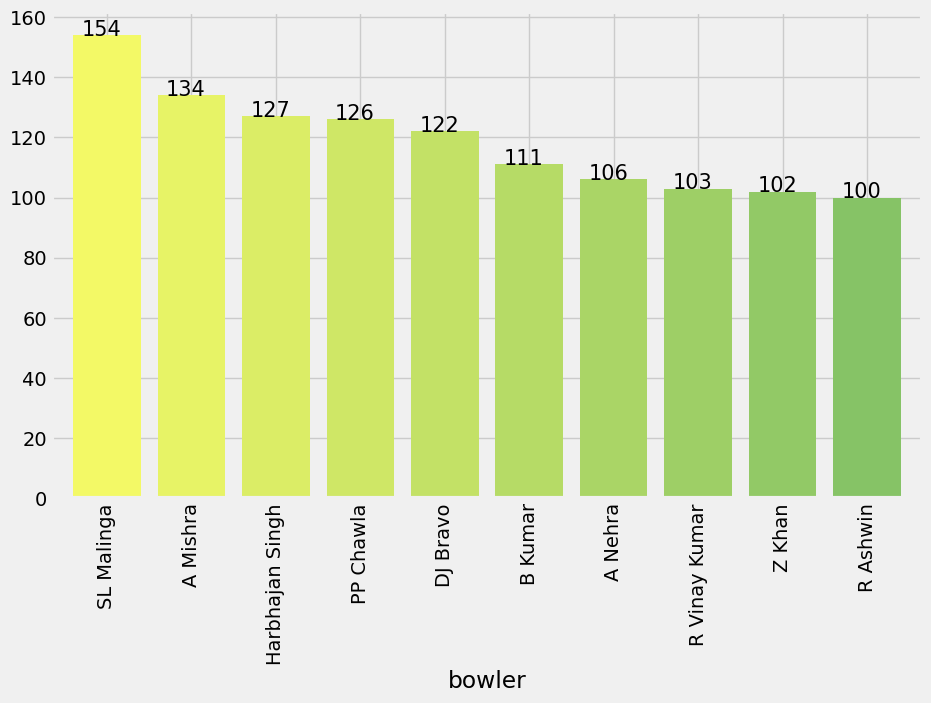

In [70]:
plt.subplots(figsize = (10, 6))

dismissal_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

ct = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]

ax = ct['bowler'].value_counts()[:10].plot.bar(width = 0.8, color = sns.color_palette('summer_r', 20))

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + 0.10, p.get_height()), fontsize = 15)

plt.show()

## Maximum Overs 

In [71]:
eco = delivery.groupby(['bowler']).sum(numeric_only = True)
eco['total balls'] = delivery['bowler'].value_counts()
eco['overs'] = (eco['total balls']//6)
eco[eco['overs'] > 200].sort_values(by = 'overs', ascending = 0)['overs'].head(5).reset_index()

bowler  overs
0  Harbhajan Singh    498
1         A Mishra    450
2       SL Malinga    449
3          P Kumar    439
4        PP Chawla    432

In [72]:
eco['economy'] = (eco['total_runs'] / (eco['overs']))

eco[eco['overs'] > 300].sort_values('economy')[:10].economy.reset_index().T

0         1         2           3                4         5  \
bowler   SP Narine  R Ashwin  DW Steyn  SL Malinga  Harbhajan Singh   B Kumar   
economy   6.395706  6.493639  6.615599    6.757238         6.933735  7.046784   

                6         7         8         9  
bowler   A Mishra   PP Ojha    Z Khan   P Kumar  
economy  7.344444  7.404321  7.546174  7.612756

## Top 20 Bowlers

In [73]:
bowlers = delivery.groupby('bowler').sum(numeric_only = True).reset_index()

In [74]:
bowl = delivery['bowler'].value_counts().reset_index()
bowl.columns = ['bowler', 'balls']
bowl['index'] = range(1, len(bowl) + 1)

bowl['bowler'] = bowl['bowler'].astype(str)
bowlers['bowler'] = bowlers['bowler'].astype(str)

bowlers = bowlers.merge(bowl, on = 'bowler', how = 'left')

bowlers = bowlers[['bowler', 'total_runs', 'balls']]

bowlers.rename({'total_runs': 'runs_given'}, axis = 1, inplace = True)

bowlers['overs'] = bowlers['balls']//6

dismissal_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']
ct = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]
ct = ct['bowler'].value_counts()[:20].reset_index()
ct.columns = ['bowler', 'wickets']

ct['bowler'] = ct['bowler'].astype(str)

bowlers = bowlers.merge(ct, on = 'bowler', how = 'left').dropna()

bowlers['economy'] = bowlers['runs_given'] / bowlers['overs']
bowlers.head()

bowler  runs_given  balls  overs  wickets   economy
5    A Mishra        3305   2703    450    134.0  7.344444
7     A Nehra        2537   1974    329    106.0  7.711246
50    B Kumar        2410   2054    342    111.0  7.046784
88   DJ Bravo        2815   2110    351    122.0  8.019943
103  DW Steyn        2375   2159    359     92.0  6.615599

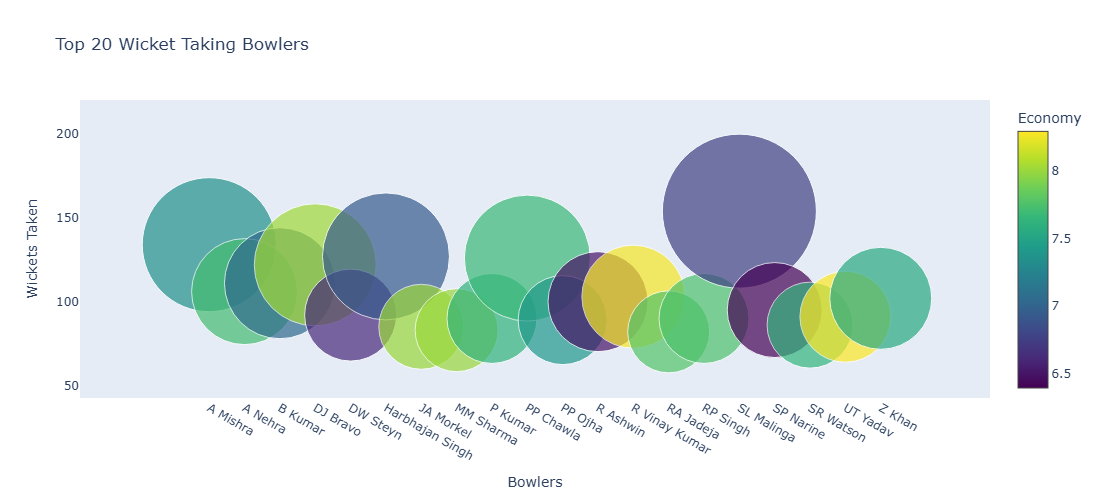

In [75]:
trace = go.Scatter(
    y = bowlers['wickets'],
    x = bowlers['bowler'],
    mode = 'markers',
    marker = dict(
        size = bowlers['wickets'].values,
        color = bowlers['economy'].values,
        colorscale = 'Viridis',
        showscale = True,
        colorbar = dict(title = 'Economy'),
    ),
    text = bowlers['overs'].values
)
data = [(trace)]

layout = go.Layout(
    autosize = False,
    width = 1000,
    height = 500,
    title = 'Top 20 Wicket Taking Bowlers',
    hovermode = 'closest',
    xaxis = dict(
        showgrid = False,
        zeroline = False,
        showline = False,
        title = 'Bowlers'
    ),
    yaxis = dict(
        title = 'Wickets Taken',
        ticklen = 5,
        gridwidth = 2,
        showgrid = False,
        zeroline = False,
        showline = False,
    ),
    showlegend = False
)

fig = go.Figure(data = data, layout = layout)
py.iplot(fig, filename = 'scatterChol')

## Highest Dismissals for a Batsman by a Bowler

In [76]:
def get_top_bowler(batsman_name):
    batsman_data = delivery[delivery['batsman'] == batsman_name]
    batsman_data = batsman_data[batsman_data['dismissal_kind'].isin(['caught', 'bowled', 'stumped', 'caught and bowled', 'hit wicket'])]
    top_bowler = (batsman_data.groupby('bowler').count().sort_values(by = 'dismissal_kind', ascending = False).dismissal_kind[:1].reset_index())
    top_bowler['batsman'] = batsman_name
    return top_bowler

In [77]:
batsmen = ['CH Gayle', 'V Kohli', 'SK Raina', 'AB de Villiers', 'MS Dhoni',
           'G Gambhir', 'RG Sharma', 'RV Uthappa', 'S Dhawan', 'DA Warner']

In [78]:
results = [get_top_bowler(batsman) for batsman in batsmen]

In [79]:
new = pd.concat(results, ignore_index = True)

In [80]:
new[['batsman', 'bowler', 'dismissal_kind']]
new.columns = ['batsman', 'No_of_Dismissals', 'bowler']

new.head()

batsman  No_of_Dismissals          bowler
0   Sandeep Sharma                 4        CH Gayle
1          A Nehra                 6         V Kohli
2  Harbhajan Singh                 5        SK Raina
3        KH Pandya                 4  AB de Villiers
4           Z Khan                 7        MS Dhoni

## Purple Caps by Each Season

In [81]:
dismissal_kinds = ['bowled', 'caught', 'lbw', 'stumped', 'caught and bowled', 'hit wicket']

purple = delivery[delivery['dismissal_kind'].isin(dismissal_kinds)]

purple = delivery.merge(matches, left_on = 'match_id', right_on = 'id', how = 'outer')

In [82]:
purple = purple.groupby(['season', 'bowler'])['dismissal_kind'].count().reset_index()

In [83]:
purple = purple.sort_values('dismissal_kind', ascending = False)

In [84]:
purple = purple.drop_duplicates('season', keep = 'first').sort_values(by = 'season')

In [85]:
purple.rename({'dismissal_kind':'count_wickets'}, axis = 1, inplace = True)

In [86]:
purple

season           bowler  count_wickets
51      2008          MS Gony            371
174     2009         RP Singh            382
210     2010         A Kumble            389
447     2011       SL Malinga            397
554     2012         R Ashwin            402
640     2013  Harbhajan Singh            430
733     2014         AR Patel            403
831     2015          A Nehra            385
939     2016          B Kumar            414
1077    2017        JJ Bumrah            373

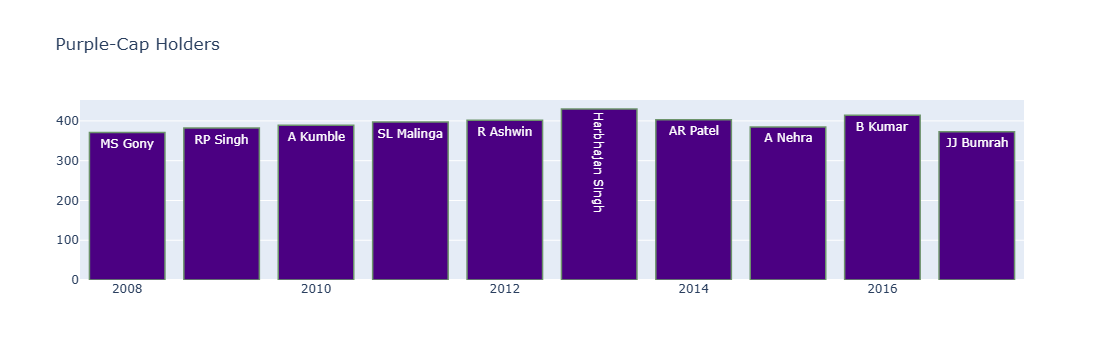

In [87]:
trace1 = go.Bar(
    x = purple['season'].values,
    y = purple['count_wickets'].values,
    name = 'Total Matches',
    text = purple['bowler'].values,
    marker = dict(
        color = 'rgb(75, 0, 130)',
        line = dict(
            color = 'rgb(108, 148, 107)',
            width = 1.5
        )
    ),
    opacity = 1
)

layout = go.Layout(
    title = 'Purple-Cap Holders',
)

data = [trace1]
fig = go.Figure(data = data, layout = layout)

py.iplot(fig, filename = 'stacked-bar')